# BI-PRS: semestr√°ln√≠ projekt 3

C√≠lem t≈ôet√≠ho semestr√°ln√≠ho projektu je anal√Ωza hrub√©ho dom√°c√≠ho produktu evropsk√Ωch zem√≠. Zamƒõ≈ô√≠me se na srovn√°n√≠ HDP r≈Øzn√Ωch evropsk√Ωch zem√≠ v nƒõjak√©m konkr√©tn√≠m roce a identifikujeme trendy a vzory ve v√Ωvoji jejich ekonomik. D√°le se pokus√≠me porozumƒõt faktor≈Øm, kter√© ovliv≈àuj√≠ rozd√≠ly v HDP mezi jednotliv√Ωmi zemƒõmi a jak√Ωm zp≈Øsobem politick√©, soci√°ln√≠ a ekonomick√© faktory formuj√≠ ekonomickou prosperitu Evropy. Na≈°e anal√Ωza by mƒõla poskytnout ucelen√Ω pohled na ekonomickou situaci a trendy v Evropƒõ a slou≈æit jako z√°klad pro diskusi o mo≈æn√Ωch politik√°ch a opat≈ôen√≠ch pro podporu ekonomick√©ho r≈Østu a prosperity v regionu.

N√°≈° t√Ωm se skl√°d√° ze t≈ô√≠ lid√≠: Ruslana Orazbekova (orazbrus), Nelly Shikina (shikinel), Daria Sychova (sychodar). Nejprve zjist√≠me, pro kter√Ω rok budeme data zkoumat pomoc√≠ zn√°m√©ho vzorce. Reprezentatntem ve t≈ôet√≠m semestr√°ln√≠m projektu je Nelly Shikina.

In [1]:
# K = den narozen√≠ reprezentanta skupiny (1-31)
# L = poƒçet p√≠smen v p≈ô√≠jmen√≠ reprezentanta
# M = ((K+L)√ó47)mod11+1

K <- 16
L <- nchar('Shikina')
M <- ((K + L) * 47) %% 11 + 1
print(M)
print(2011 + M)

[1] 4
[1] 2015


Uva≈æujeme tedy data z roku 2015.

Nejd≈ô√≠ve naƒçteme pot≈ôebn√© knihovny a po≈æadovan√Ω dataset.

In [2]:
library(eurostat)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(lmtest)
library(car)

‚îÄ‚îÄ Attaching core tidyverse packages ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ tidyverse 2.0.0 ‚îÄ‚îÄ
‚úî dplyr     1.1.4     ‚úî readr     2.1.5
‚úî forcats   1.0.0     ‚úî stringr   1.5.1
‚úî ggplot2   3.5.0     ‚úî tibble    3.2.1
‚úî lubridate 1.9.3     ‚úî tidyr     1.3.1
‚úî purrr     1.0.2     
‚îÄ‚îÄ Conflicts ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ tidyverse_conflicts() ‚îÄ‚îÄ
‚úñ dplyr::filter() masks stats::filter()
‚úñ dplyr::lag()    masks stats::lag()
‚Ñπ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


The following object is maske

In [3]:
# Retrieving GDP data at market prices in euro per capita
data <- get_eurostat("nama_10_pc", time_format = "num", filters = list(na_item = "B1GQ", unit = "CP_EUR_HAB", time = 2015))

# Display the first rows of data for checking
head(data)

Table nama_10_pc cached at C:\Users\Nelly\AppData\Local\Temp\RtmpIH9hh9/eurostat/c969c5f661382795d91768474846af53.rds



freq unit       na_item geo       time values
1 A    CP_EUR_HAB B1GQ    EU27_2020 2015 27500 
2 A    CP_EUR_HAB B1GQ    EU28      2015 29180 
3 A    CP_EUR_HAB B1GQ    EU15      2015 33810 
4 A    CP_EUR_HAB B1GQ    EA        2015 31080 
5 A    CP_EUR_HAB B1GQ    EA20      2015 30830 
6 A    CP_EUR_HAB B1GQ    EA19      2015 31080

Prozkoumejme, co znamenaj√≠ jednotliv√© sloupce datsetu.

1. **freq**: Tento sloupec ud√°v√° frekvenci, s jakou jsou data zaznamen√°na. V tomto p≈ô√≠padƒõ je to "A", co≈æ znamen√°, ≈æe data jsou roƒçn√≠.

2. **unit**: Sloupec `unit` oznaƒçuje jednotku, v n√≠≈æ jsou hodnoty ud√°v√°ny. Zde je uvedeno "CP_EUR_HAB", co≈æ znamen√° "current prices, euros per inhabitant", tedy hodnoty jsou vyj√°d≈ôeny v eurech na obyvatele.

3. **na_item**: Tento sloupec oznaƒçuje polo≈æku N√°rodn√≠ch √∫ƒçt≈Ø podle zvolen√©ho krit√©ria.

4. **geo**: Sloupec `geo` oznaƒçuje geografickou oblast, pro kterou jsou hodnoty uvedeny.

5. **time**: Tento sloupec obsahuje rok, ke kter√©mu se √∫daje vztahuj√≠.

6. **values**: Sloupec `values` obsahuje samotn√© hodnoty HDP vyj√°d≈ôen√© v eurech na obyvatele pro danou oblast (zemƒõ/region) a rok.

In [4]:
# Label the data with label_eurostat
data <- label_eurostat(data)
head(data)

freq   unit                           
1 Annual Current prices, euro per capita
2 Annual Current prices, euro per capita
3 Annual Current prices, euro per capita
4 Annual Current prices, euro per capita
5 Annual Current prices, euro per capita
6 Annual Current prices, euro per capita
  na_item                                
1 Gross domestic product at market prices
2 Gross domestic product at market prices
3 Gross domestic product at market prices
4 Gross domestic product at market prices
5 Gross domestic product at market prices
6 Gross domestic product at market prices
  geo                                                                                                          
1 European Union - 27 countries (from 2020)                                                                    
2 European Union - 28 countries (2013-2020)                                                                    
3 European Union - 15 countries (1995-2004)                                                                    
4 Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)
5 Euro area ‚Äì 20 countries (from 2023)                                                                         
6 Euro area - 19 countries  (2015-2022)                                                                        
  time values
1 2015 27500 
2 2015 29180 
3 2015 33810 
4 2015 31080 
5 2015 30830 
6 2015 31080

Je vidƒõt, ≈æe dataset obsahuje redundantn√≠ sloupce, tak≈æe ne≈æ p≈ôejdeme k √∫kol≈Øm samotn√Ωm, data trochu uprav√≠me. Zbav√≠me se nƒõkter√Ωch sloupc≈Ø.

In [5]:
# Drop unnecessary columns
data <- subset(data, select = c("geo", "values"))
head(data)

geo                                                                                                          
1 European Union - 27 countries (from 2020)                                                                    
2 European Union - 28 countries (2013-2020)                                                                    
3 European Union - 15 countries (1995-2004)                                                                    
4 Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)
5 Euro area ‚Äì 20 countries (from 2023)                                                                         
6 Euro area - 19 countries  (2015-2022)                                                                        
  values
1 27500 
2 29180 
3 33810 
4 31080 
5 30830 
6 31080

In [6]:
# Checking if we have NaN values
any_na <- any(is.na(data))
print(any_na)

[1] TRUE


N√°≈° dataset m√° NA hodnoty. Pod√≠vejme se, kde p≈ôesnƒõ n√°m chyb√≠ data.

In [7]:
# Identifying missing values
missing_values <- is.na(data)

# Display rows with missing values
rows_with_missing <- data[apply(missing_values, 1, any), ]
print(rows_with_missing)

# A tibble: 2 √ó 2
  geo                    values
  <chr>                   <int>
1 Bosnia and Herzegovina     NA
2 Kosovo*                    NA


Chybƒõj√≠c√≠ hodnoty jsou identifikov√°ny v zem√≠ch "Bosnia a Herzegovina" a "Kosovo*". Hodnoty HDP pro tyto zemƒõ v roce 2015 chyb√≠ (oznaƒçeny jako NA).

In [8]:
# Identifying neighboring countries for Bosnia and Herzegovina and Kosovo
neighbors_BiH <- c("Croatia", "Serbia", "Montenegro")
neighbors_Kosovo <- c("Albania", "North Macedonia", "Serbia")

# Selecting data for neighboring countries
data_neighbors_BiH <- subset(data, geo %in% neighbors_BiH)
data_neighbors_Kosovo <- subset(data, geo %in% neighbors_Kosovo)

# Calculating the average GDP of neighboring countries
mean_BiH <- mean(data_neighbors_BiH$values, na.rm = TRUE)
mean_Kosovo <- mean(data_neighbors_Kosovo$values, na.rm = TRUE)

# Replacing missing values with the averages of neighboring countries
data$values[data$geo == "Bosnia and Herzegovina" & is.na(data$values)] <- mean_BiH
data$values[data$geo == "Kosovo*" & is.na(data$values)] <- mean_Kosovo

# Displaying the modified data
print(data[data$geo %in% c("Bosnia and Herzegovina", "Kosovo*"), ])

# A tibble: 2 √ó 2
  geo                    values
  <chr>                   <dbl>
1 Bosnia and Herzegovina  7240 
2 Kosovo*                 4447.


T√≠mto zp≈Øsobem jsme nahradily chybƒõj√≠c√≠ hodnoty pr≈Ømƒõrn√Ωm HDP sousedn√≠ch zem√≠.

In [9]:
# Checking if we have NaN values
any_na <- any(is.na(data))
print(any_na)

[1] FALSE


Data jsou v po≈ô√°dku. Pojƒème na ty √∫lohy.

## ‚ú≠ √öloha 1

Kr√°tce prezentujeme rozdƒõlen√≠ HDP a jeho charakteristiky ƒç√≠selnƒõ i graficky. Probereme si, jak√© √∫daje o jednotliv√Ωch zem√≠ch mohou m√≠t vliv na HDP.

In [10]:
# Basic GDP characteristics
summary(data$values)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3560   11702   25355   29879   38190  148440 

Tyto ƒç√≠seln√© charakteristiky poskytuj√≠ u≈æiteƒçn√© informace o rozdƒõlen√≠ HDP v evropsk√Ωch zem√≠ch v roce 2015:

- **Minim√°ln√≠ hodnota**: Nejni≈æ≈°√≠ hodnota HDP v eurech na obyvatele z cel√©ho souboru je 3560. To ukazuje na nejmen≈°√≠ √∫rove≈à ekonomick√© prosperity mezi zkouman√Ωmi zemƒõmi.

- **Prvn√≠ kvartil (1st Qu.)**: Hodnota, pod kterou spad√° prvn√≠ ƒçtvrtina dat, je 11702 eur na obyvatele. To znamen√°, ≈æe 25 % zem√≠ m√° HDP ni≈æ≈°√≠ ne≈æ tato hodnota.

- **Medi√°n**: Medi√°n, co≈æ je st≈ôedn√≠ hodnota datov√©ho souboru, je 25355 eur na obyvatele. To znamen√°, ≈æe polovina zem√≠ m√° HDP ni≈æ≈°√≠ ne≈æ tento medi√°n a polovina m√° vy≈°≈°√≠.

- **Pr≈Ømƒõr (Mean)**: Pr≈Ømƒõrn√° hodnota HDP v evropsk√Ωch zem√≠ch v roce 2015 je 29879 eur na obyvatele. To je aritmetick√Ω pr≈Ømƒõr v≈°ech hodnot HDP.

- **T≈ôet√≠ kvartil (3rd Qu.)**: Hodnota, pod kterou spad√° t≈ôet√≠ ƒçtvrtina dat, je 38190 eur na obyvatele. To znamen√°, ≈æe 75 % zem√≠ m√° HDP ni≈æ≈°√≠ ne≈æ tato hodnota.

- **Maxim√°ln√≠ hodnota**: Nejvy≈°≈°√≠ hodnota HDP v eurech na obyvatele z cel√©ho souboru je 148440. Jedn√° se o nejvy≈°≈°√≠ √∫rove≈à ekonomick√© prosperity mezi zkouman√Ωmi zemƒõmi.

Tyto statistick√© √∫daje n√°m poskytuj√≠ p≈ôehled o rozdƒõlen√≠ HDP a jeho variabilitƒõ mezi evropsk√Ωmi zemƒõmi v roce 2015. Pro p≈ôehlednost nyn√≠ vykresl√≠me histogram rozdƒõlen√≠ HDP v roce 2015.

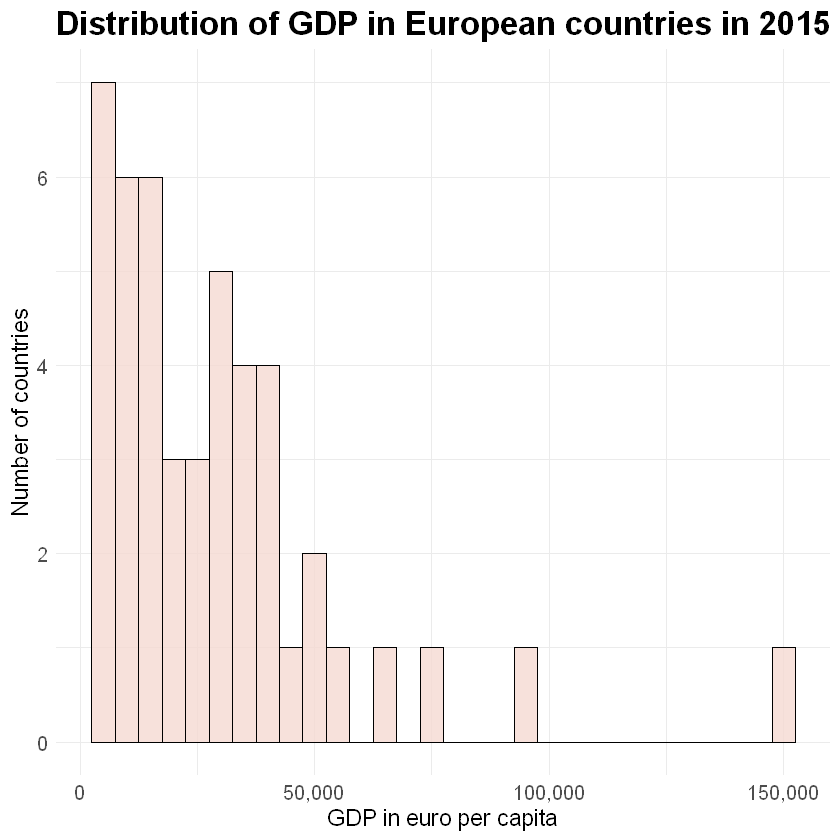

In [11]:
# Histogram
ggplot(data, aes(x = values)) +
  geom_histogram(binwidth = 5000, fill = "#F5DAD2", color = "black", alpha = 0.8) +  # Alpha channel for clarity
  labs(title = "Distribution of GDP in European countries in 2015",
       x = "GDP in euro per capita",
       y = "Number of countries") +
  scale_x_continuous(labels = scales::comma) +  # Adding thousands separators to the x-axis
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),  # Caption size and style
        axis.text = element_text(size = 12),  # Text size on axes
        axis.title = element_text(size = 14))  # Size of axis labels

Tento histogram zobrazuje rozdƒõlen√≠ hrub√©ho dom√°c√≠ho produktu (HDP) v evropsk√Ωch zem√≠ch v roce 2015. Na osu x je uvedeno HDP v eurech na obyvatele a na osu y poƒçet zem√≠, kter√© dos√°hly dan√© √∫rovnƒõ HDP.

Graf ukazuje, ≈æe vƒõt≈°ina zem√≠ m√° HDP mezi 10 000 a 50 000 eur na obyvatele. Existuje tak√© men≈°√≠ poƒçet zem√≠ s HDP nad 50 000 eur na obyvatele, co≈æ m≈Ø≈æe zahrnovat zemƒõ s vy≈°≈°√≠mi √∫rovnƒõmi ekonomick√© prosperity.

R≈Øzn√© faktory mohou ovliv≈àovat HDP zem√≠. Nƒõkter√© z hlavn√≠ch faktor≈Ø zahrnuj√≠:

* **Ekonomick√° politika**: Makroekonomick√° politika vl√°d, vƒçetnƒõ monet√°rn√≠ politiky a fisk√°ln√≠ politiky, m≈Ø≈æe m√≠t vliv na HDP.

* **Obchodn√≠ politika**: Otev≈ôenost zemƒõ obchodu s ostatn√≠mi zemƒõmi m≈Ø≈æe ovlivnit HDP prost≈ôednictv√≠m exportu a importu zbo≈æ√≠ a slu≈æeb.

* **Technologick√Ω pokrok**: Inovace a technologick√Ω pokrok mohou zvy≈°ovat produktivitu a stimulovat r≈Øst HDP.

* **Pracovn√≠ trh**: Zamƒõstnanost, √∫rove≈à mezd a pracovn√≠ podm√≠nky mohou ovlivnit schopnost zemƒõ generovat HDP.

* **Infrastruktura**: Kvalita infrastruktury, vƒçetnƒõ dopravn√≠ch s√≠t√≠ a telekomunikac√≠, m≈Ø≈æe m√≠t vliv na efektivitu ekonomiky a t√≠m i na HDP.

* **Politick√° stabilita**: Politick√° stabilita a pr√°vn√≠ r√°mec mohou ovlivnit investice a obchod, co≈æ m≈Ø≈æe m√≠t vliv na HDP.

Nyn√≠ m≈Ø≈æeme pokraƒçovat √∫lohou 2.

## ‚ú≠ √öloha 2

Rozhodly jsme se p≈ôidat dal≈°√≠ [dataset](https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023) s informacemi o r≈Øzn√Ωch zem√≠ch, vƒçetnƒõ evropsk√Ωch zem√≠ z na≈°eho projektu.

> This comprehensive dataset provides a wealth of information about all countries worldwide, covering a wide range of indicators and attributes. It encompasses demographic statistics, economic indicators, environmental factors, healthcare metrics, education statistics, and much more. With every country represented, this dataset offers a complete global perspective on various aspects of nations, enabling in-depth analyses and cross-country comparisons.

Pro zkouman√© zemƒõ m≈Ø≈æeme jako regresory zvolit n√°sleduj√≠c√≠ ƒçty≈ôi p≈ô√≠znaky:

1. **Pr≈Ømƒõrn√Ω vƒõk obyvatelstva**: tato numerick√° promƒõnn√° m≈Ø≈æe poskytnout informace o demografick√© struktu≈ôe zemƒõ a jej√≠m vlivu na ekonomiku, jako je nap≈ô√≠klad pracovn√≠ s√≠la a spot≈ôeba.

2. **Hustota zalidnƒõn√≠**: dal≈°√≠ numerick√° promƒõnn√°, kter√° m≈Ø≈æe ovlivnit HDP, je hustota zalidnƒõn√≠. Vy≈°≈°√≠ hustota obvykle znamen√° vƒõt≈°√≠ ekonomickou aktivitu a p≈ô√≠stup k vƒõt≈°√≠mu trhu.

3. **Jazyk**: tato kategori√°ln√≠ promƒõnn√° m≈Ø≈æe b√Ωt u≈æiteƒçn√° pro rozli≈°en√≠ mezi zemƒõmi na z√°kladƒõ ofici√°ln√≠ho nebo dominantn√≠ho jazyka. Zemƒõ se shodn√Ωm jazykem mohou m√≠t lep≈°√≠ obchodn√≠ vztahy a komunikaci, co≈æ m≈Ø≈æe m√≠t pozitivn√≠ vliv na ekonomiku a cestovn√≠ ruch.

4. **Mƒõna**: dal≈°√≠ kategori√°ln√≠ promƒõnn√°, kter√° m≈Ø≈æe b√Ωt d≈Øle≈æit√°, je mƒõna, kterou zemƒõ pou≈æ√≠v√°. Zemƒõ pou≈æ√≠vaj√≠c√≠ euro mohou m√≠t v√Ωhodu v obchodƒõ a stabilitƒõ mƒõny ve srovn√°n√≠ s zemƒõmi, kter√© pou≈æ√≠vaj√≠ jin√© mƒõny.

Nyn√≠ bychom mohly pou≈æ√≠t regresn√≠ anal√Ωzu k urƒçen√≠ vztahu mezi tƒõmito promƒõnn√Ωmi a HDP (nap≈ô. pomoc√≠ line√°rn√≠ regrese).

Chceme z√≠skat data o pr≈Ømƒõrn√©m vƒõku obyvatelstva z Eurostatu pro rok 2015 s pomoc√≠ identifik√°toru MEDAGEPOP pro st≈ôedn√≠ vƒõk obyvatelstva. Vytvo≈ô√≠me dotaz do datab√°ze Eurostatu, abychom mohly z√≠skat po≈æadovan√° data.

#### ‚ú¶ Pr≈Ømƒõrn√Ω vƒõk a hustota zalidnƒõn√≠

In [12]:
# Data query on the average age of the population in 2019
data_age <- get_eurostat("eq_pop04", filters = list(time="2015", indic_de = "MEDAGEPOP"))

# Displaying first rows of data
head(data_age)

Table eq_pop04 cached at C:\Users\Nelly\AppData\Local\Temp\RtmpIH9hh9/eurostat/03ff2aa0569bd6f9f527efd9029b13a8.rds



freq indic_de  geo       time       values
1 A    MEDAGEPOP EU27_2020 2015-01-01 42.7  
2 A    MEDAGEPOP EA20      2015-01-01   NA  
3 A    MEDAGEPOP EA19      2015-01-01 43.3  
4 A    MEDAGEPOP BE        2015-01-01 41.4  
5 A    MEDAGEPOP BG        2015-01-01 43.4  
6 A    MEDAGEPOP CZ        2015-01-01 41.1

In [13]:
# Drop unnecessary columns
data_age <- subset(data_age, select = c("geo", "values"))
data_age <- label_eurostat(data_age)
head(data_age)

geo                                       values
1 European Union - 27 countries (from 2020) 42.7  
2 Euro area ‚Äì 20 countries (from 2023)        NA  
3 Euro area - 19 countries  (2015-2022)     43.3  
4 Belgium                                   41.4  
5 Bulgaria                                  43.4  
6 Czechia                                   41.1

Pro z√≠sk√°n√≠ dat o hustotƒõ zalidnƒõn√≠ z Eurostatu pro rok 2015 s pomoc√≠ identifik√°toru tps00003 pro hustotu zalidnƒõn√≠ vytvo≈ô√≠me dotaz do datab√°ze Eurostatu.

In [14]:
data_density <- get_eurostat("tps00003", filters = list(time="2015"))

head(data_density)

Table tps00003 cached at C:\Users\Nelly\AppData\Local\Temp\RtmpIH9hh9/eurostat/c7702b1bd2abef01544c34be6801cb94.rds



freq unit    geo       time       values
1 A    PER_KM2 EU27_2020 2015-01-01 108.1 
2 A    PER_KM2 EA20      2015-01-01    NA 
3 A    PER_KM2 EA19      2015-01-01    NA 
4 A    PER_KM2 BE        2015-01-01 371.8 
5 A    PER_KM2 BG        2015-01-01  66.2 
6 A    PER_KM2 CZ        2015-01-01 136.6

In [15]:
# Identifying missing values
missing_values <- is.na(data_age)

# Display rows with missing values
rows_with_missing <- data_age[apply(missing_values, 1, any), ]
print(rows_with_missing)

# A tibble: 7 √ó 2
  geo                                  values
  <chr>                                 <dbl>
1 Euro area ‚Äì 20 countries (from 2023)     NA
2 Metropolitan France                      NA
3 Norway                                   NA
4 Kosovo*                                  NA
5 Andorra                                  NA
6 Russia                                   NA
7 San Marino                               NA


In [16]:
# Drop unnecessary columns
data_density <- subset(data_density, select = c("geo", "values"))
data_density <- label_eurostat(data_density)
head(data_density)

geo                                       values
1 European Union - 27 countries (from 2020) 108.1 
2 Euro area ‚Äì 20 countries (from 2023)         NA 
3 Euro area - 19 countries  (2015-2022)        NA 
4 Belgium                                   371.8 
5 Bulgaria                                   66.2 
6 Czechia                                   136.6

In [17]:
# Identifying missing values
missing_values <- is.na(data_density)

# Display rows with missing values
rows_with_missing <- data_density[apply(missing_values, 1, any), ]
print(rows_with_missing)

# A tibble: 3 √ó 2
  geo                                   values
  <chr>                                  <dbl>
1 Euro area ‚Äì 20 countries (from 2023)      NA
2 Euro area - 19 countries  (2015-2022)     NA
3 Serbia                                    NA


In [18]:
summary(data_age$values)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  30.50   38.67   41.25   40.25   42.73   45.90       7 

In [19]:
summary(data_density$values)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    3.3    68.5   102.4   158.3   136.6  1408.4       3 

Warning message:
"Removed 7 rows containing non-finite outside the scale range (`stat_bin()`)."
Warning message:
"Removed 3 rows containing non-finite outside the scale range (`stat_bin()`)."


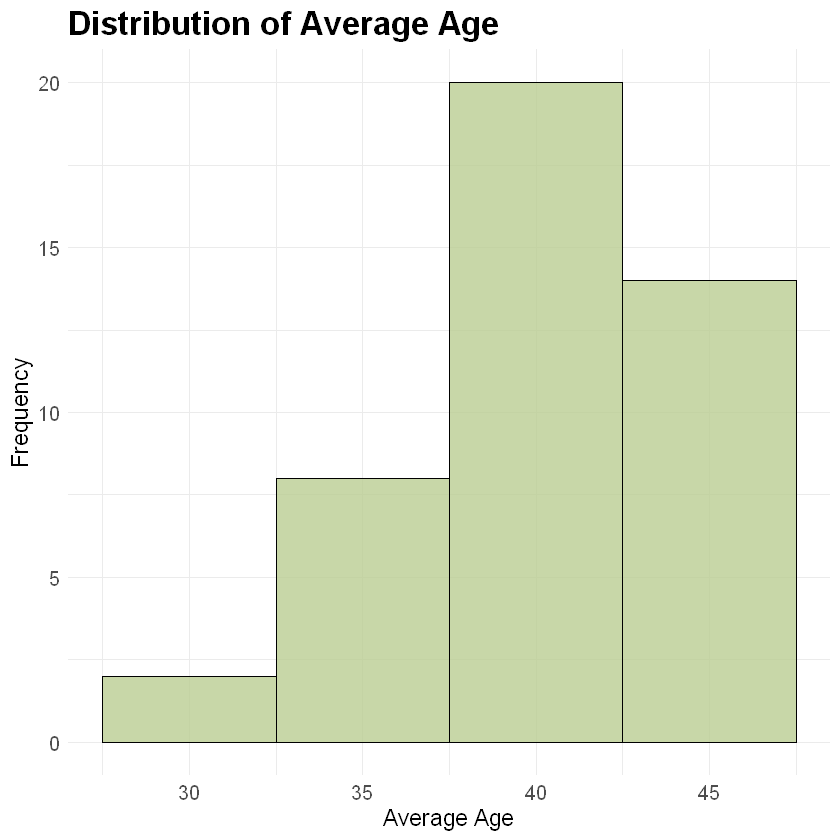

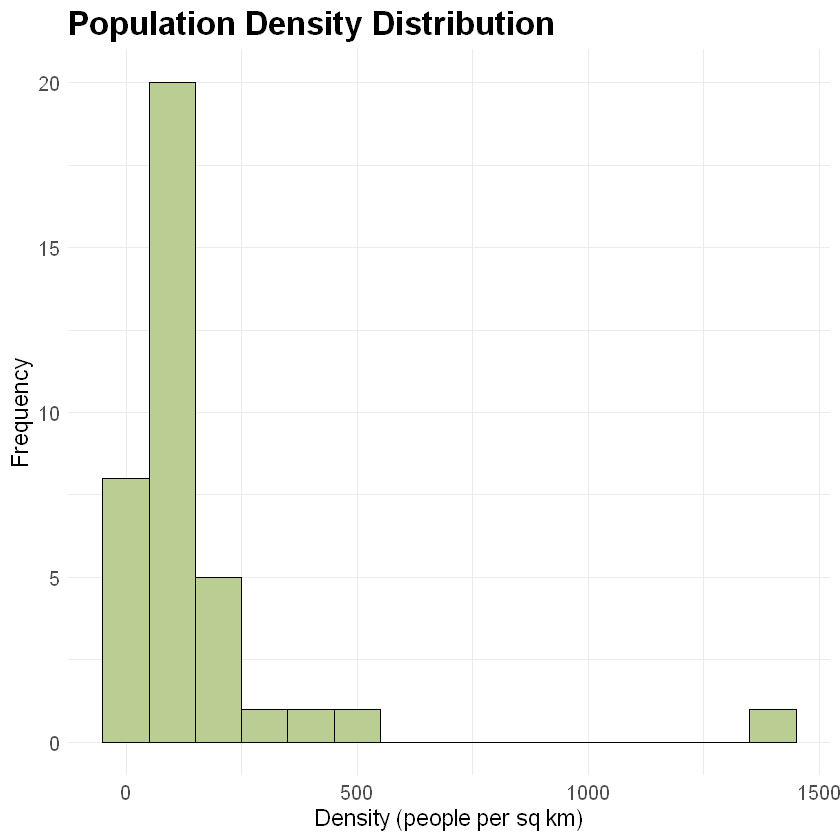

In [20]:
# Age histogram
ggplot(data_age, aes(x=values)) + 
  geom_histogram(binwidth=5, fill="#BACD92", color="black", alpha = 0.8) +
  labs(title = "Distribution of Average Age",
       x = "Average Age",
       y = "Frequency") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),  # Caption size and style
        axis.text = element_text(size = 12),  # Text size on axes
        axis.title = element_text(size = 14))  # Size of axis labels


# Density histogram
ggplot(data_density, aes(x=values)) + 
  geom_histogram(binwidth=100, fill="#BACD92", color="black") +  
  labs(title = "Population Density Distribution",
       x = "Density (people per sq km)",
       y = "Frequency") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),  # Caption size and style
        axis.text = element_text(size = 12),  # Text size on axes
        axis.title = element_text(size = 14))  # Size of axis labels

Na histogramu distribuce pr≈Ømƒõrn√©ho vƒõku vid√≠me, ≈æe nejvƒõt≈°√≠ poƒçet zem√≠ m√° pr≈Ømƒõrn√Ω vƒõk obyvatelstva kolem 40 let, zat√≠mco distribuce hustoty zalidnƒõn√≠ ukazuje, ≈æe vƒõt≈°ina zem√≠ m√° n√≠zkou hustotu zalidnƒõn√≠, s nƒõkolika zemƒõmi v√Ωraznƒõ odli≈°n√Ωmi s velmi vysokou hustotou.

In [21]:
# Rename
data_age_renamed <- data_age %>% rename(age = values)
data_density_renamed <- data_density %>% rename(density = values)

# Join
combined_data <- left_join(data_age_renamed, data_density_renamed, by = "geo")

# Correlation
correlation_result <- cor(combined_data$age, combined_data$density, use = "complete.obs")
print(correlation_result)

[1] 0.07637682


Korelace ve v√Ω≈°i 0,07637682 ukazuje velmi slabou pozitivn√≠ souvislost mezi pr≈Ømƒõrn√Ωm vƒõkem a hustotou zalidnƒõn√≠. To znamen√°, ≈æe vztah mezi tƒõmito dvƒõma promƒõnn√Ωmi je t√©mƒõ≈ô zanedbateln√Ω a nen√≠ v√Ωznamn√Ωm faktorem ve vƒõt≈°inƒõ ekonomick√Ωch model≈Ø.

In [22]:
data_hdp_renamed <- data %>% rename(hdp = values)

In [23]:
data1 <- merge(data_hdp_renamed, data_age_renamed, by = "geo")
data2 <- merge(data1, data_density_renamed, by = "geo")

In [24]:
head(data2)

geo      hdp   age  density
1 Albania   3560 34.7 100.1  
2 Austria  39890 43.0 104.9  
3 Belgium  36960 41.4 371.8  
4 Bulgaria  6380 43.4  66.2  
5 Croatia  10810 42.8  74.4  
6 Cyprus   21170 37.0  92.0

#### ‚ú¶ Jazyk a mƒõna

In [25]:
# Loading data from a CSV file
world_data <- read.csv("world-data-2023.csv", header = TRUE, sep = ",", quote = "\"", dec = ".", fill = TRUE, na.strings = c("", "NA"))

head(world_data)

Country             Density..P.Km2. Abbreviation Agricultural.Land....
1 Afghanistan         60              AF           58.10%               
2 Albania             105             AL           43.10%               
3 Algeria             18              DZ           17.40%               
4 Andorra             164             AD           40.00%               
5 Angola              26              AO           47.50%               
6 Antigua and Barbuda 223             AG           20.50%               
  Land.Area.Km2. Armed.Forces.size Birth.Rate Calling.Code
1 652,230        323,000           32.49       93         
2 28,748         9,000             11.78      355         
3 2,381,741      317,000           24.28      213         
4 468            NA                 7.20      376         
5 1,246,700      117,000           40.73      244         
6 443            0                 15.33        1         
  Capital.Major.City     Co2.Emissions ‚ãØ Out.of.pocket.health.expenditure
1 Kabul                  8,672         ‚ãØ 78.40%                          
2 Tirana                 4,536         ‚ãØ 56.90%                          
3 Algiers                150,006       ‚ãØ 28.10%                          
4 Andorra la Vella       469           ‚ãØ 36.40%                          
5 Luanda                 34,693        ‚ãØ 33.40%                          
6 St. John's, Saint John 557           ‚ãØ 24.30%                          
  Physicians.per.thousand Population Population..Labor.force.participation....
1 0.28                    38,041,754 48.90%                                   
2 1.20                    2,854,191  55.70%                                   
3 1.72                    43,053,054 41.20%                                   
4 3.33                    77,142     NA                                       
5 0.21                    31,825,295 77.50%                                   
6 2.76                    97,118     NA                                       
  Tax.revenue.... Total.tax.rate Unemployment.rate Urban_population Latitude 
1 9.30%           71.40%         11.12%            9,797,273         33.93911
2 18.60%          36.60%         12.33%            1,747,593         41.15333
3 37.20%          66.10%         11.70%            31,510,100        28.03389
4 NA              NA             NA                67,873            42.50628
5 9.20%           49.10%         6.89%             21,061,025       -11.20269
6 16.50%          43.00%         NA                23,800            17.06082
  Longitude 
1  67.709953
2  20.168331
3   1.659626
4   1.521801
5  17.873887
6 -61.796428

In [26]:
colnames(world_data)

[1] "Country"                                  
 [2] "Density..P.Km2."                          
 [3] "Abbreviation"                             
 [4] "Agricultural.Land...."                    
 [5] "Land.Area.Km2."                           
 [6] "Armed.Forces.size"                        
 [7] "Birth.Rate"                               
 [8] "Calling.Code"                             
 [9] "Capital.Major.City"                       
[10] "Co2.Emissions"                            
[11] "CPI"                                      
[12] "CPI.Change...."                           
[13] "Currency.Code"                            
[14] "Fertility.Rate"                           
[15] "Forested.Area...."                        
[16] "Gasoline.Price"                           
[17] "GDP"                                      
[18] "Gross.primary.education.enrollment...."   
[19] "Gross.tertiary.education.enrollment...."  
[20] "Infant.mortality"                         
[21] "Largest.city"                             
[22] "Life.expectancy"                          
[23] "Maternal.mortality.ratio"                 
[24] "Minimum.wage"                             
[25] "Official.language"                        
[26] "Out.of.pocket.health.expenditure"         
[27] "Physicians.per.thousand"                  
[28] "Population"                               
[29] "Population..Labor.force.participation...."
[30] "Tax.revenue...."                          
[31] "Total.tax.rate"                           
[32] "Unemployment.rate"                        
[33] "Urban_population"                         
[34] "Latitude"                                 
[35] "Longitude"

In [27]:
data_language <- world_data %>% select(Country, Official.language) 

In [28]:
data_language_renamed <- data_language %>% rename(geo = Country, language = Official.language)

In [29]:
data_currency <- world_data %>% select(Country, Currency.Code) 

In [30]:
data_currency_renamed <- data_currency %>% rename(geo = Country, currency = Currency.Code)

In [31]:
summary(data_language_renamed)

     geo              language        
 Length:195         Length:195        
 Class :character   Class :character  
 Mode  :character   Mode  :character  

In [32]:
summary(data_currency_renamed)

     geo              currency        
 Length:195         Length:195        
 Class :character   Class :character  
 Mode  :character   Mode  :character  

In [33]:
data3 <- merge(data_hdp_renamed, data_language_renamed, by = "geo")
data4 <- merge(data3, data_currency_renamed, by = "geo")

In [34]:
head(data4)

geo                    hdp   language  currency
1 Albania                 3560 Albanian  ALL     
2 Austria                39890 German    EUR     
3 Belgium                36960 French    EUR     
4 Bosnia and Herzegovina  7240 Bosnian   BAM     
5 Bulgaria                6380 Bulgarian BGN     
6 Croatia                10810 Croatian  HRK

In [35]:
data4 <- data4 %>%
  mutate(language = as.factor(language),
         currency = as.factor(currency))

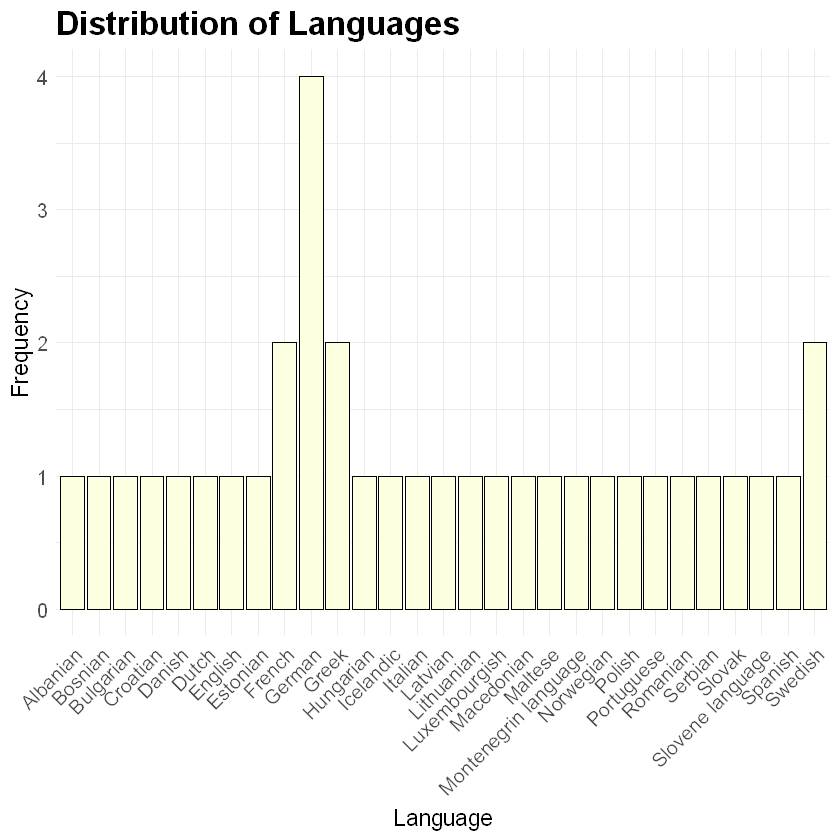

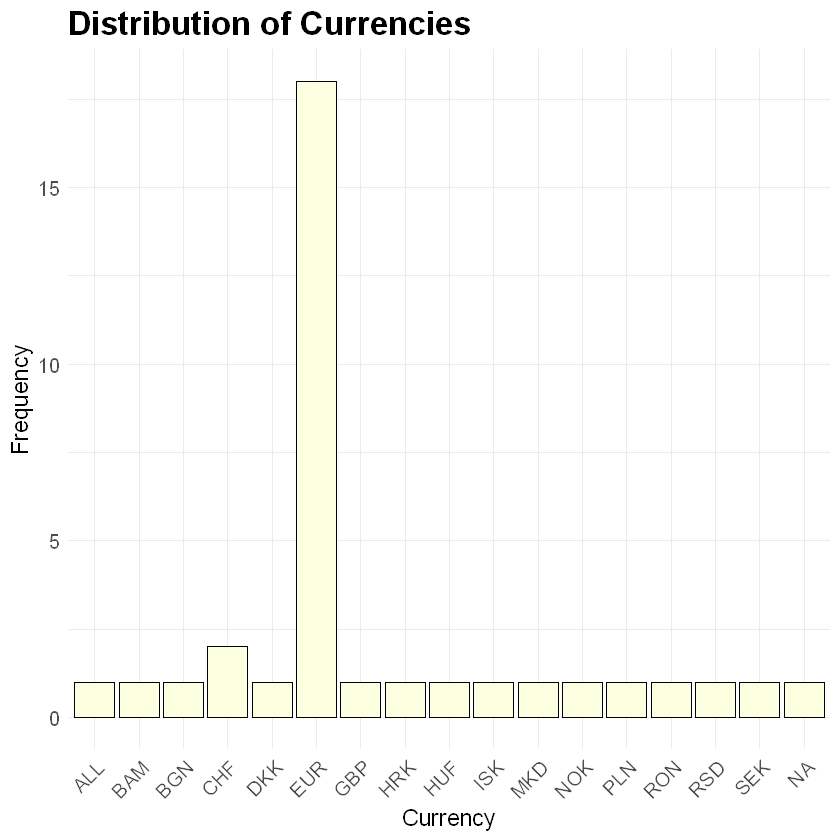

In [36]:
# language barplot
ggplot(data4, aes(x=language)) + 
  geom_bar(fill="#FCFFE0", color="black") +
  labs(title = "Distribution of Languages",
       x = "Language",
       y = "Frequency") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),  # Caption size and style
        axis.text = element_text(size = 12),  # Text size on axes
        axis.title = element_text(size = 14),  # Size of axis labels
        axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate and align x-axis labels

# Currency barplot
ggplot(data4, aes(x=currency)) + 
  geom_bar(fill="#FCFFE0", color="black") +
  labs(title = "Distribution of Currencies",
       x = "Currency",
       y = "Frequency") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),  # Caption size and style
        axis.text = element_text(size = 12),  # Text size on axes
        axis.title = element_text(size = 14),  # Size of axis labels
        axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate and align x-axis labels

In [37]:
table_language_currency <- table(data4$language, data4$currency)

# Fisher's test
fisher_test <- fisher.test(table_language_currency)
print(fisher_test)


	Fisher's Exact Test for Count Data

data:  table_language_currency
p-value = 1.375e-11
alternative hypothesis: two.sided



V√Ωsledky Fisherova p≈ôesn√©ho testu s p-hodnotou 1.375e-11 ukazuj√≠, ≈æe mezi jazykem a mƒõnou existuje statisticky v√Ωznamn√° z√°vislost.

## ‚ú≠ √öloha 3

Pomoc√≠ line√°rn√≠ho regresn√≠ho modelu zkoumejme z√°vislost HDP na v≈°ech regresorech.

### ‚ú¶ Pr≈Ømƒõrn√Ω vƒõk a hustota zalidnƒõn√≠

In [38]:
model1 <- lm(hdp ~ age + density, data = data2)
summary(model1)


Call:
lm(formula = hdp ~ age + density, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-25928 -18463  -8590   7645 114444 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -17192.40   65230.19  -0.264    0.794
age           1120.52    1599.63   0.700    0.489
density         13.14      20.88   0.630    0.533

Residual standard error: 29100 on 33 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.02827,	Adjusted R-squared:  -0.03063 
F-statistic:  0.48 on 2 and 33 DF,  p-value: 0.623


#### ‚ùÄ Interpretace hodnot odhad≈Ø regresn√≠ch koeficient≈Ø
**Intercept** p≈ôedstavuje odhadovanou st≈ôedn√≠ hodnotu z√°visl√© promƒõnn√© (hdp), pokud jsou v≈°echny nez√°visl√© promƒõnn√© (age a density) nulov√©. V tomto p≈ô√≠padƒõ je intercept -17192,40, ale nen√≠ statisticky v√Ωznamn√Ω, proto≈æe p-hodnota (0,794) je vƒõt≈°√≠ ne≈æ zvolen√° hladina v√Ωznamnosti (nap≈ô. 0,05). Proto nen√≠ vhodn√© interpretovat intercept v tomto modelu.

**Age** m√° koeficient 1120,52. To znamen√°, ≈æe p≈ôi zachov√°n√≠ ostatn√≠ch promƒõnn√Ωch se s ka≈ædou jednotkou zv√Ω≈°en√≠ vƒõku odhadovan√° hodnota hdp zv√Ω≈°√≠ o 1120,52 jednotky. Koeficient v≈°ak nen√≠ statisticky v√Ωznamn√Ω (p-hodnota = 0,489 > 0,05), co≈æ naznaƒçuje, ≈æe vƒõk nem√° v tomto modelu v√Ωznamn√Ω line√°rn√≠ vztah s hdp.

**Density** m√° koeficient 13.14. To znamen√°, ≈æe p≈ôi zachov√°n√≠ ostatn√≠ch promƒõnn√Ωch se p≈ôi ka≈æd√©m jednotkov√©m zv√Ω≈°en√≠ hustoty odhadovan√° hodnota hdp zv√Ω≈°√≠ o 13,14 jednotky. Podobnƒõ jako u promƒõnn√© vƒõk nen√≠ koeficient pro hustotu statisticky v√Ωznamn√Ω (p-hodnota = 0,533 > 0,05), co≈æ naznaƒçuje, ≈æe hustota nemus√≠ m√≠t v tomto modelu v√Ωznamn√Ω line√°rn√≠ vztah s hdp.

#### ‚ùÄ Kvalita modelu
Prvn√≠ model je regrese zalo≈æen√° na HDP a vƒõku/hustotƒõ zalidnƒõn√≠. Koeficient determinace (Multiple R-squared) je 0,02827, co≈æ je hodnota bl√≠zk√° nule; to znamen√°, ≈æe pouze 2,83 % rozptylu z√°visl√© promƒõnn√© (HDP) je vysvƒõtleno nez√°visl√Ωmi promƒõnn√Ωmi (vƒõk a hustota). V nejhor≈°√≠m p≈ô√≠padƒõ bude m√≠t model ùëÖ2 = 0, a nejsme od toho daleko. Adjustovan√Ω koeficient determinace je je≈°tƒõ ni≈æ≈°√≠ a ƒçin√≠ -0,03063 (jeho hodnota bude v≈ædy men≈°√≠ nebo rovna hodnotƒõ ùëÖ2). Hodnota men≈°√≠ ne≈æ 0 opƒõt znamen√°, ≈æe model nem√° ≈æ√°dnou vypov√≠dac√≠ hodnotu.

F-statistika testuje celkovou v√Ωznamnost regresn√≠ho modelu. Hodnota F-statistiky se porovn√°v√° s prahovou hodnotou, kter√° je odvozena z F-rozdƒõlen√≠. V√Ωsledek testu se zji≈°≈•uje pomoc√≠ p-hodnoty, kter√° je v na≈°√©m p≈ô√≠padƒõ 0.623, co≈æ je vy≈°≈°√≠ ne≈æ bƒõ≈æn√° hladina v√Ωznamnosti 0.05. To znamen√°, ≈æe nem√°me dostateƒçn√© statistick√© d≈Økazy k z√°vƒõru, ≈æe alespo≈à jedna z nez√°visl√Ωch promƒõnn√Ωch m√° statisticky v√Ωznamn√Ω vliv na z√°vislou promƒõnnou. Tak≈æe F-statistika nen√≠ statisticky v√Ωznamn√° a regresn√≠ model jako celek taky nen√≠ v√Ωznamn√Ω.

#### ‚ùÄ Anal√Ωza rezidu√≠

Zaj√≠m√°j√≠ n√°s p≈ôedev≈°√≠m **pr≈Ømƒõr rezidu√≠** (ide√°lnƒõ hodnota okolo nuly) a **normalita rezidu√≠** (pomoc√≠ testu normality).

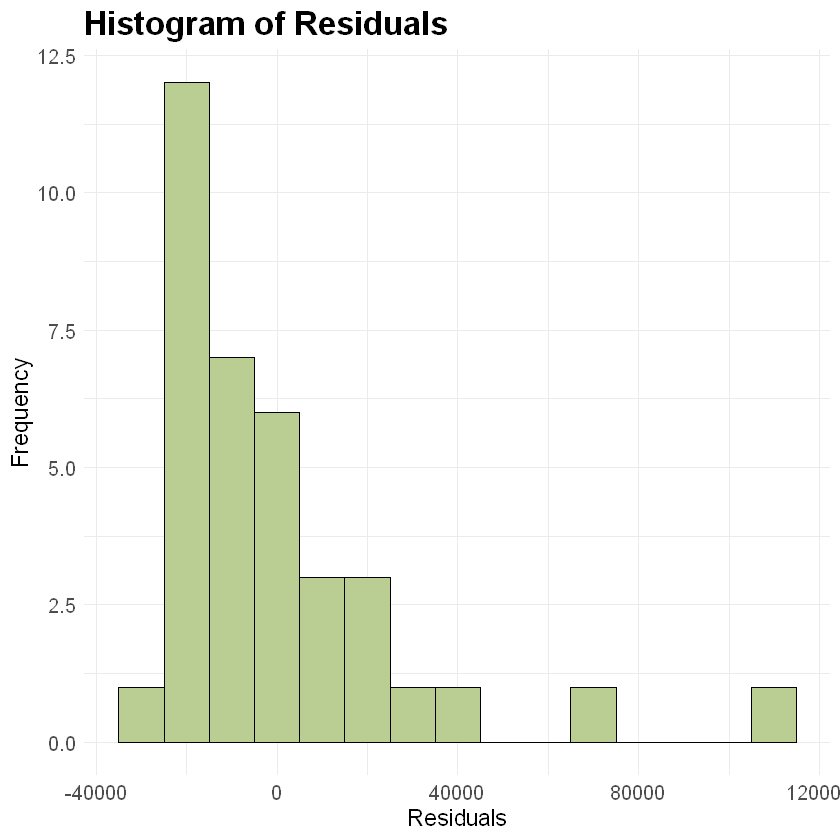

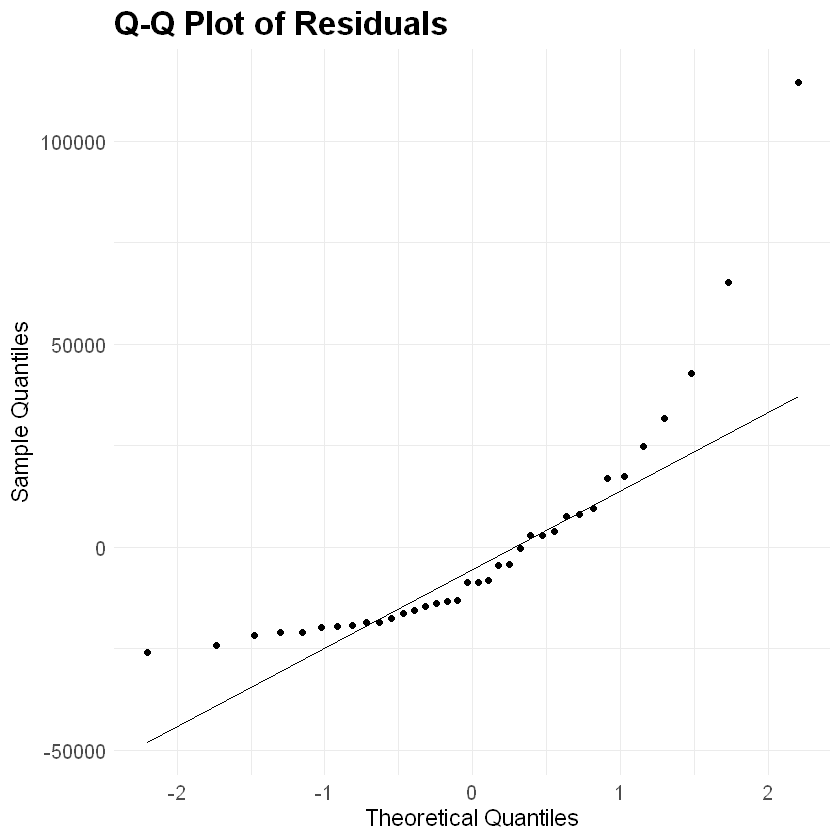

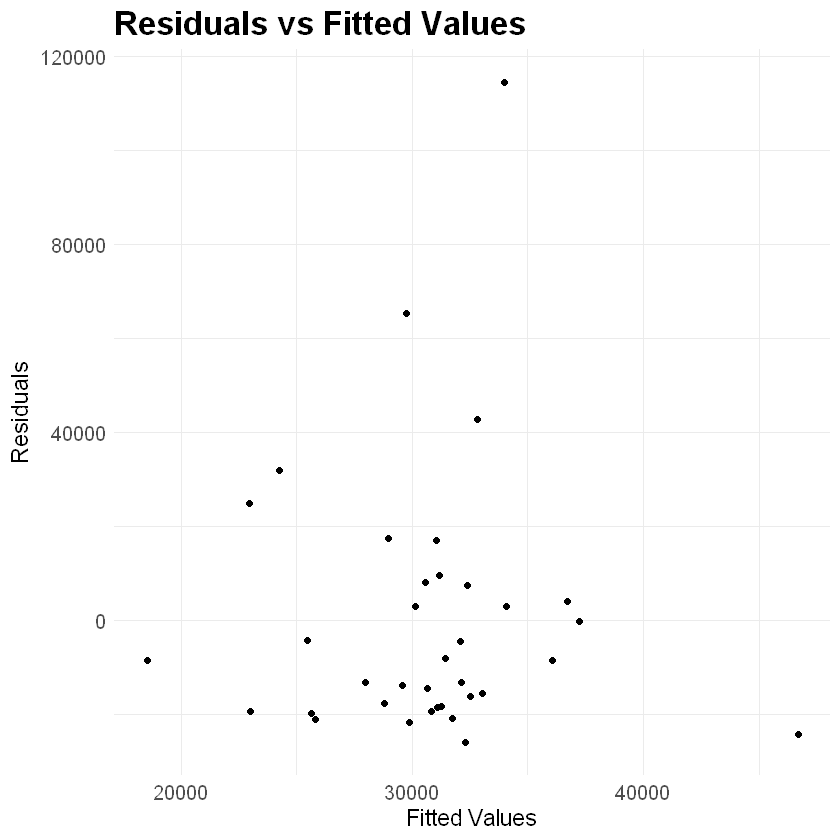

In [39]:
# Histogram of residuals
ggplot(data = data.frame(residuals = resid(model1)), aes(x = residuals)) +
  geom_histogram(binwidth=10000, fill = "#BACD92", color = "black") +
  labs(title = "Histogram of Residuals",
       x = "Residuals",
       y = "Frequency") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),
        axis.text = element_text(size = 12),
        axis.title = element_text(size = 14))

# Q-Q plot of residuals
ggplot(data = data.frame(residuals = resid(model1)), aes(sample = residuals)) +
  stat_qq() +
  stat_qq_line() +
  labs(title = "Q-Q Plot of Residuals",
       x = "Theoretical Quantiles",
       y = "Sample Quantiles") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),
        axis.text = element_text(size = 12),
        axis.title = element_text(size = 14))

# Plot of residuals vs fitted values
ggplot(data = data.frame(fitted_values = fitted(model1), residuals = resid(model1)), 
                              aes(x = fitted_values, y = residuals)) +
  geom_point(fill = "#FCFFE0", color = "black") +
  labs(title = "Residuals vs Fitted Values",
       x = "Fitted Values",
       y = "Residuals") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),
        axis.text = element_text(size = 12),
        axis.title = element_text(size = 14))

In [47]:
# Calculate mean of residuals
mean_residuals <- mean(resid(model1))
print(mean_residuals)

# Normality of residuals: Shapiro-Wilk test
shapiro_test <- shapiro.test(resid(model1))
normality <- ifelse(shapiro_test$p.value >= 0.05, "Normally distributed", "Not normally distributed")
print(normality)

[1] 1.252332e-13
[1] "Not Normally Distributed"


Pr≈Ømƒõr rezidu√≠ je hodnota velmi bl√≠zk√° nule, co≈æ znamen√°, ≈æe rezidua jsou v pr≈Ømƒõru soust≈ôedƒõna kolem nuly, co≈æ je pro rezidua line√°rn√≠ho regresn√≠ho modelu ≈æ√°douc√≠ vlastnost.

V√Ωsledky Shapiro-Wilkova testu ukazuj√≠, ≈æe p-hodnota je ni≈æ≈°√≠ ne≈æ hladina v√Ωznamnosti 0,05. Proto zam√≠t√°me nulovou hypot√©zu o normalitƒõ, co≈æ znamen√°, ≈æe rezidua nejsou norm√°lnƒõ rozdƒõlena.

#### ‚ùÄ Odlehl√° pozorov√°n√≠ a multikolinearita

Odlehl√© hodnoty identifikujeme pomoc√≠ Cookovy vzd√°lenosti. Multikolinearitu zkoum√°me pomoc√≠ VIF a korelaƒçn√≠ matice.

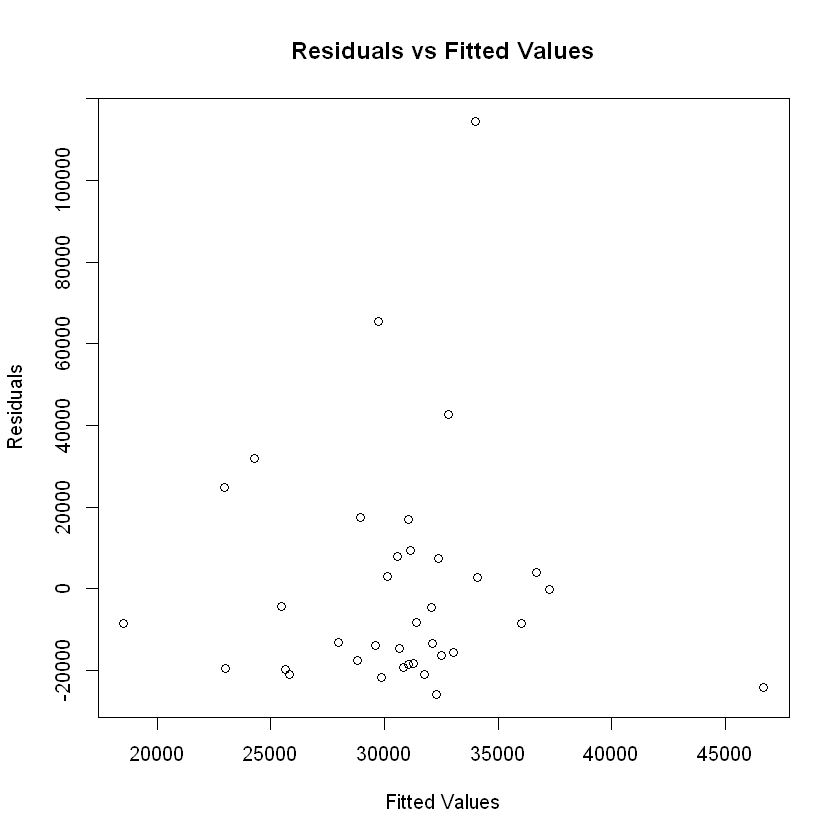

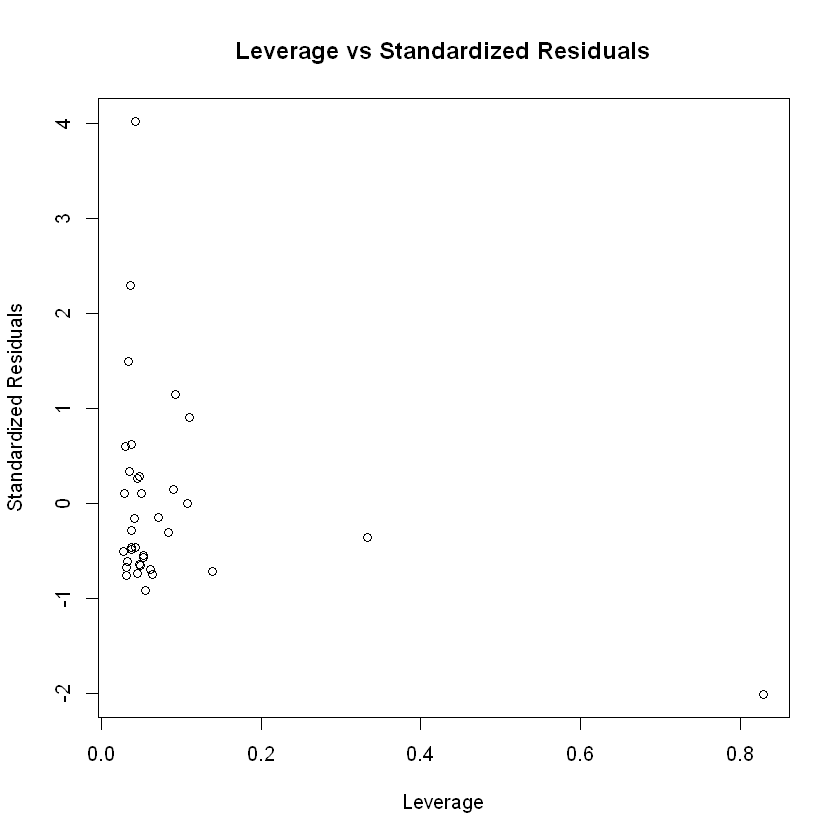

[1] "VIF values:"
     age  density 
1.005868 1.005868 
[1] "Correlation Matrix:"
        age density
age       1      NA
density  NA       1


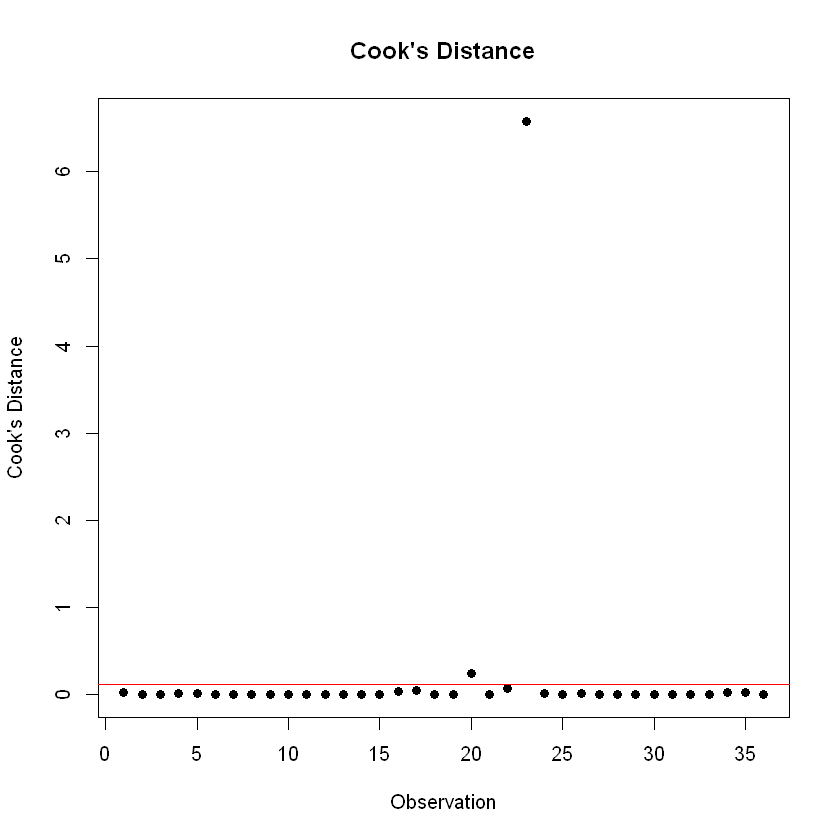

In [41]:
# Identify outliers
# Residual Analysis
plot(fitted(model1), resid(model1), main = "Residuals vs Fitted Values", xlab = "Fitted Values", ylab = "Residuals")

# Leverage-Residual plot
plot(hatvalues(model1), rstandard(model1), main = "Leverage vs Standardized Residuals", xlab = "Leverage", ylab = "Standardized Residuals")

# Cook's distance
cooks_dist <- cooks.distance(model1)
plot(cooks_dist, pch = 19, main = "Cook's Distance", xlab = "Observation", ylab = "Cook's Distance")
abline(h = 4/length(cooks_dist), col = "red")  # Highlight a threshold for influential observations

# Explore multicollinearity
# VIF
vif_values <- vif(model1)
print("VIF values:")
print(vif_values)

# Correlation matrix
correlation_matrix <- cor(data2[, c("age", "density")])
print("Correlation Matrix:")
print(correlation_matrix)

**VIF (Variance Inflation Factor)** mƒõ≈ô√≠ m√≠ru multikolinearity mezi predikƒçn√≠mi promƒõnn√Ωmi. Hodnoty VIF bl√≠zk√© 1 naznaƒçuj√≠, ≈æe rozptyl odhad≈Ø koeficient≈Ø tƒõchto promƒõnn√Ωch nen√≠ nafouknut√Ω v d≈Øsledku multikolinearity. Obvykle se za p≈ôijateln√© pova≈æuj√≠ hodnoty VIF ni≈æ≈°√≠ ne≈æ 5 nebo 10, co≈æ odpov√≠d√° n√≠zk√© multikolinearitƒõ.
V na≈°em p≈ô√≠padƒõ jsou hodnoty VIF pro "age" i "density" p≈ôibli≈ænƒõ 1. To znamen√°, ≈æe mezi tƒõmito predikƒçn√≠mi promƒõnn√Ωmi neexistuje v√Ωznamn√° multikolinearita.

**Korelaƒçn√≠ matice** ukazuje p√°rov√© korelaƒçn√≠ koeficienty mezi predikƒçn√≠mi promƒõnn√Ωmi. Korelaƒçn√≠ koeficient 1 nebo -1 znamen√° dokonalou pozitivn√≠, resp. negativn√≠ korelaci. Korelaƒçn√≠ koeficient bl√≠zk√Ω 0 naznaƒçuje, ≈æe mezi promƒõnn√Ωmi neexistuje line√°rn√≠ korelace.
V na≈°em v√Ωstupu nen√≠ k dispozici korelaƒçn√≠ koeficient mezi "age" a "density" (NA). To znamen√°, ≈æe mezi tƒõmito dvƒõma promƒõnn√Ωmi neexistuje ≈æ√°dn√° korelace.

Otestujeme p≈ôedpoklady modelu - pokud nebudou splnƒõny, vyv√≠j√≠me a otestujeme metody, kter√© toto selh√°n√≠ kompenzuj√≠ nebo p≈ôedpoklady odstra≈àuj√≠. Na to pou≈æijeme ANOVA test rozptylu. Stanov√≠me p≈ô√≠slu≈°n√© hypot√©zy.

**‚óè Promƒõnn√° "age"**

$H_0:$ Koeficient promƒõnn√© "age" v regresn√≠m modelu je roven nule.

$H_A:$ Koeficient promƒõnn√© "age" v regresn√≠m modelu nen√≠ roven nule (co≈æ naznaƒçuje v√Ωznamn√Ω vliv na z√°vislou promƒõnnou).

**‚óè Promƒõnn√° "density"**

$H_0:$ Koeficient promƒõnn√© "density" v regresn√≠m modelu je roven nule.

$H_A:$ Koeficient promƒõnn√© "density" v regresn√≠m modelu nen√≠ roven nule (co≈æ naznaƒçuje v√Ωznamn√Ω vliv na z√°vislou promƒõnnou).

In [42]:
# Fit the linear regression model
model1 <- lm(hdp ~ age + density, data = data2)

# Perform ANOVA test
anova_result <- anova(model1)

# Print ANOVA table
print(anova_result)

Analysis of Variance Table

Response: hdp
          Df     Sum Sq   Mean Sq F value Pr(>F)
age        1 4.7714e+08 477144991  0.5636 0.4581
density    1 3.3551e+08 335510159  0.3963 0.5333
Residuals 33 2.7936e+10 846540567               


Na z√°kladƒõ v√Ωsledk≈Ø ANOVA vyvozujeme z√°vƒõry.

Promƒõnn√° "age": p-hodnota (0,4581) je vy≈°≈°√≠ ne≈æ zvolen√° hladina v√Ωznamnosti (0,05). Nulovou hypot√©zu pro ‚Äûvƒõk‚Äú tedy nezam√≠t√°me. Nen√≠ dostatek d≈Økaz≈Ø pro z√°vƒõr, ≈æe vƒõk m√° v√Ωznamn√Ω vliv na HDP.

Promƒõnn√° "density": p-hodnota (0.5333) je opƒõt vy≈°≈°√≠ ne≈æ zvolen√° hladina v√Ωznamnosti. Proto nezam√≠t√°me nulovou hypot√©zu ani pro hustotu. Neexistuje dostatek d≈Økaz≈Ø pro z√°vƒõr, ≈æe hustota m√° v√Ωznamn√Ω vliv na HDP.

Na z√°kladƒõ v√Ωsledk≈Ø testu ANOVA se zd√°, ≈æe ani vƒõk, ani hustota zalidnƒõn√≠ nejsou v√Ωznamn√Ωmi prediktory HDP v tomto regresn√≠m modelu.

Nyn√≠ nakresl√≠me grafy, kter√© odhal√≠ vztah mezi z√°vislou promƒõnnou HDP a promƒõnn√Ωmi age/density.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`)."
Warning message:
"Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`)."
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 3 rows containing non-finite outside the scale range (`stat_smooth()`)."
Warning message:
"Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`)."


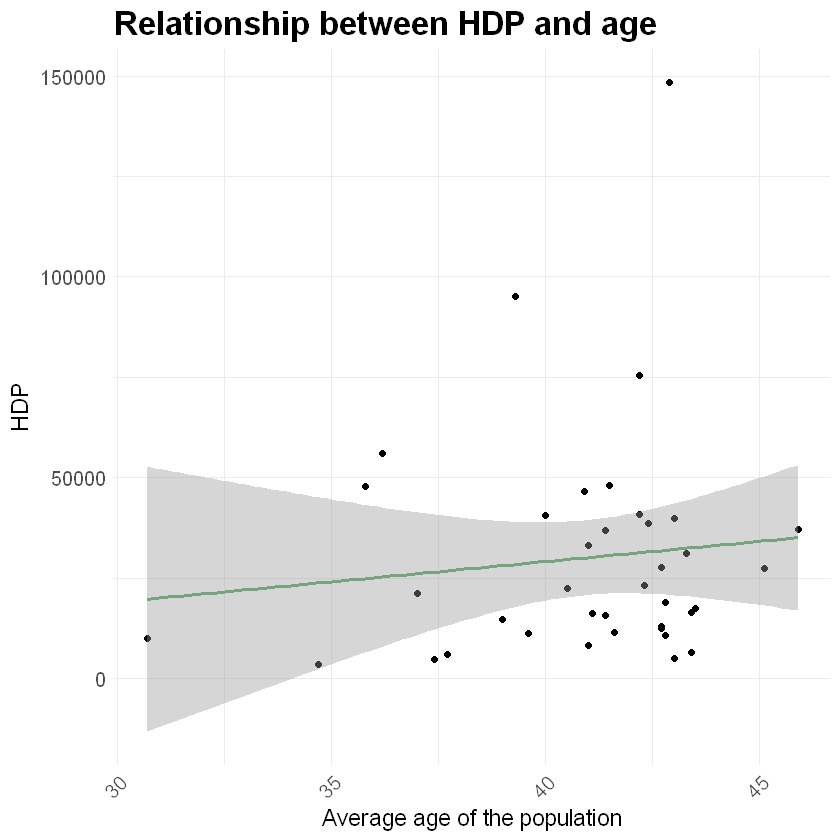

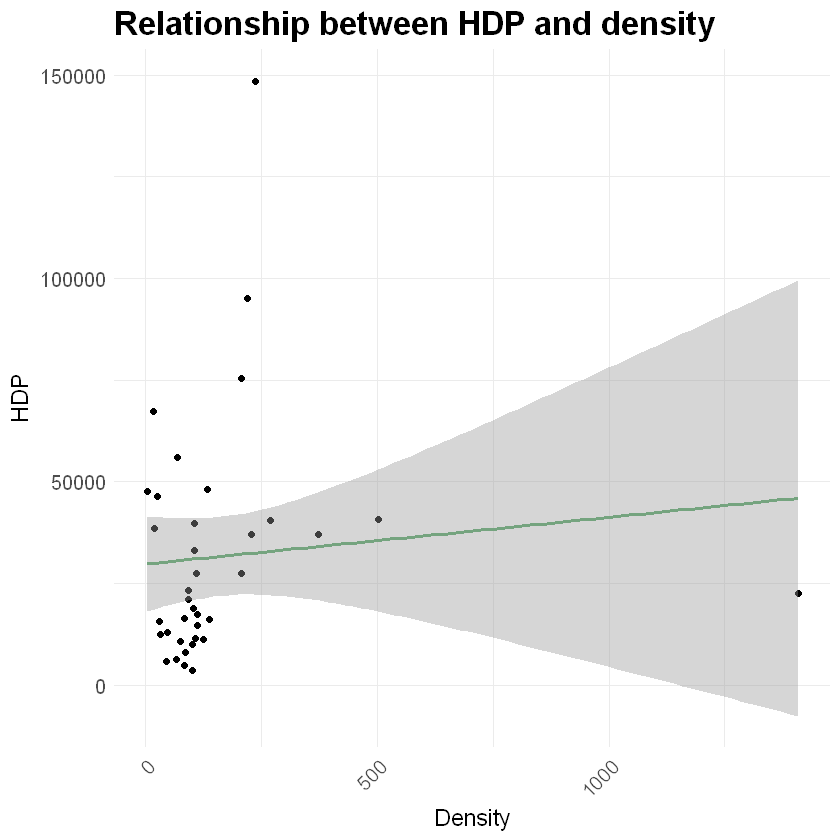

In [43]:
# HDP/Age
ggplot(data2, aes(x = age, y = hdp)) +
  geom_point() +
  geom_smooth(method = "lm", col = "#75A47F") +
  labs(title = "Relationship between HDP and age",
       x = "Average age of the population",
       y = "HDP") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),  # Caption size and style
        axis.text = element_text(size = 12),  # Text size on axes
        axis.title = element_text(size = 14),  # Size of axis labels
        axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate and align x-axis labels

# HDP/Density
ggplot(data2, aes(x = density, y = hdp)) +
  geom_point() +
  geom_smooth(method = "lm", col = "#75A47F") +
  labs(title = "Relationship between HDP and density",
       x = "Density",
       y = "HDP") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),  # Caption size and style
        axis.text = element_text(size = 12),  # Text size on axes
        axis.title = element_text(size = 14),  # Size of axis labels
        axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate and align x-axis labels

Grafy ukazuj√≠, ≈æe i kdy≈æ existuje pozitivn√≠ trend mezi pr≈Ømƒõrn√Ωm vƒõkem obyvatelstva a HDP, a negativn√≠ trend mezi hustotou obyvatelstva a HDP, oba tyto vztahy nejsou statisticky v√Ωznamn√©, co≈æ potvrzuj√≠ anal√Ωzy regresn√≠ch model≈Ø.

### ‚ú¶ Jazyk a mƒõna

In [44]:
model2 <- lm(hdp ~ language + currency, data = data4)
summary(model2)


Call:
lm(formula = hdp ~ language + currency, data = data4)

Residuals:
         1          2          3          4          5          6          7 
 1.595e-11  1.420e+03  1.970e+03  6.052e-14  2.199e-12  5.082e-13  2.435e+03 
         8          9         10         11         12         13         14 
 3.464e-12 -4.068e-12  3.191e-11 -1.970e+03 -1.420e+03 -2.435e+03  2.524e-13 
        15         16         17         18         19         20         21 
 6.503e-13 -1.169e-12 -1.737e-12  3.646e+04  5.934e-13 -1.112e-12 -1.271e-11 
        22         24         25         26         27         28         29 
 3.208e-12  1.332e-12  5.027e-12  6.391e-12 -1.339e-12 -1.339e-12 -1.339e-12 
        30         31         32         33         34         35 
-2.703e-12  2.753e-12  2.499e-14 -2.635e-11 -3.646e+04 -4.866e-13 

Coefficients: (13 not defined because of singularities)
                             Estimate Std. Error t value Pr(>|t|)
(Intercept)                      3560      258

#### ‚ùÄ Interpretace hodnot odhad≈Ø regresn√≠ch koeficient≈Ø
**Intercept** m√° hodnotu 3560. Tato hodnota nen√≠ statisticky v√Ωznamn√°, proto≈æe p-hodnota je vy≈°≈°√≠ ne≈æ obvykl√° hladina v√Ωznamnosti 0.05. To naznaƒçuje, ≈æe pr≈Ømƒõrn√° hodnota z√°visl√© promƒõnn√© nen√≠ statisticky odli≈°n√° od nuly, kdy≈æ jsou v≈°echny nez√°visl√© promƒõnn√© nulov√©.

**Regresn√≠ koeficienty pro jazyk (Language)** odpov√≠daj√≠ odhadovan√©mu rozd√≠lu v hodnotƒõ z√°visl√© promƒõnn√© mezi jednotliv√Ωmi jazyky a referenƒçn√≠m jazykem (v tomto p≈ô√≠padƒõ je referenƒçn√≠m jazykem angliƒçtina). Interpretace ka≈æd√©ho koeficientu je zalo≈æena na srovn√°n√≠ s referenƒçn√≠m jazykem. Nap≈ô√≠klad, pokud je regresn√≠ koeficient pro d√°n√Ω jazyk pozitivn√≠, znamen√° to, ≈æe pr≈Ømƒõrn√° hodnota z√°visl√© promƒõnn√© je vy≈°≈°√≠ pro tento jazyk ve srovn√°n√≠ s referenƒçn√≠m jazykem. Nap≈ô√≠klad regresn√≠ koeficient pro jazyk ≈°v√©d≈°tina je 42920. To znamen√°, ≈æe pr≈Ømƒõrn√° hodnota z√°visl√© promƒõnn√© je o 42920 vy≈°≈°√≠ pro ≈°v√©d≈°tinu ve srovn√°n√≠ s referenƒçn√≠m jazykem (pravdƒõpodobnƒõ angliƒçtinou). P-hodnota pro ka≈æd√Ω regresn√≠ koeficient ud√°v√° statistickou v√Ωznamnost regresn√≠ho koeficientu. Nap≈ô√≠klad, p-hodnota pro ≈°v√©d≈°tinu je 0.306, co≈æ naznaƒçuje, ≈æe tento regresn√≠ koeficient nen√≠ statisticky v√Ωznamn√Ω p≈ôi konvenƒçn√≠ hladinƒõ v√Ωznamnosti 0.05.

**Regresn√≠ koeficienty pro mƒõnu (Currency)** maj√≠ podobnou interpretaci jako koeficienty pro mƒõnu. Nap≈ô. regresn√≠ koeficient pro ≈°v√Ωcarsk√Ω frank (CHF) je 65605. To znamen√°, ≈æe pr≈Ømƒõrn√° hodnota z√°visl√© promƒõnn√© je o 65605 vy≈°≈°√≠ pro transakce v CHF ve srovn√°n√≠ s referenƒçn√≠ mƒõnou. Opƒõt p-hodnota ud√°v√° statistickou v√Ωznamnost regresn√≠ho koeficientu.

#### ‚ùÄ Kvalita modelu
Druh√Ω model ukazuje vztah mezi HDP a jazykem/mƒõnou. Zde vid√≠me mnohem vy≈°≈°√≠ koeficient determinace (0,9103), bl√≠≈æ√≠ se 1, co≈æ naznaƒçuje, ≈æe model vysvƒõtluje 91.03% variability z√°visl√© promƒõnn√©. M√°me ale pomƒõrnƒõ n√≠zk√Ω adjustovan√Ω koeficient determinace (0,26), co≈æ m≈Ø≈æe znamenat, ≈æe n√°≈° model je p≈ôeuƒçen√Ω. Jin√Ωmi slovy, model m≈Ø≈æe zachycovat ≈°um nebo n√°hodn√© asociace v datech, co≈æ vede k p≈ôeuƒçen√≠.

F-statistika testuje celkovou v√Ωznamnost regresn√≠ho modelu. P-hodnota pro F-statistiku ud√°v√° statistickou v√Ωznamnost modelu jako celku. V tomto p≈ô√≠padƒõ je p-hodnota 0.4111, co≈æ naznaƒçuje, ≈æe model jako celek nen√≠ statisticky v√Ωznamn√Ω p≈ôi konvenƒçn√≠ hladinƒõ v√Ωznamnosti 0.05.

#### ‚ùÄ Anal√Ωza rezidu√≠

Analyzujeme stejn√° krit√©ria jako v prvn√≠m modelu.

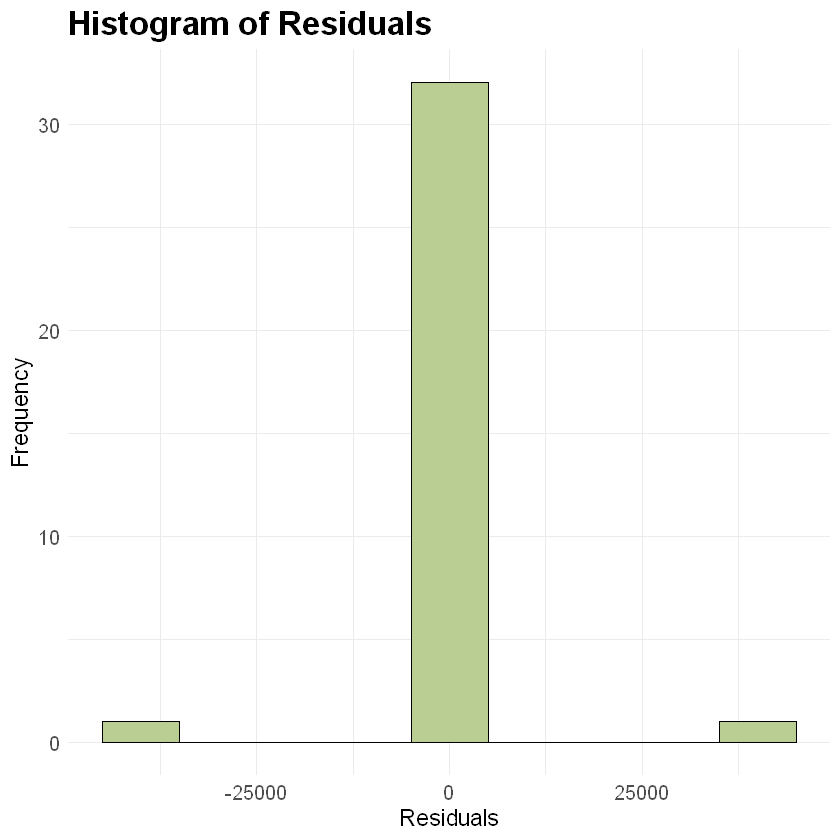

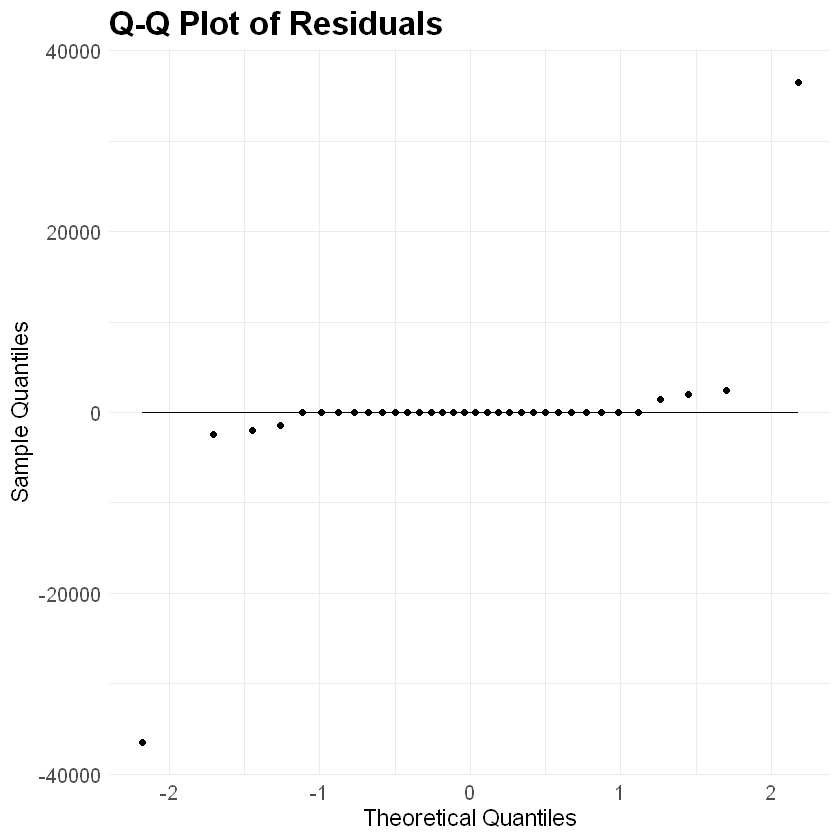

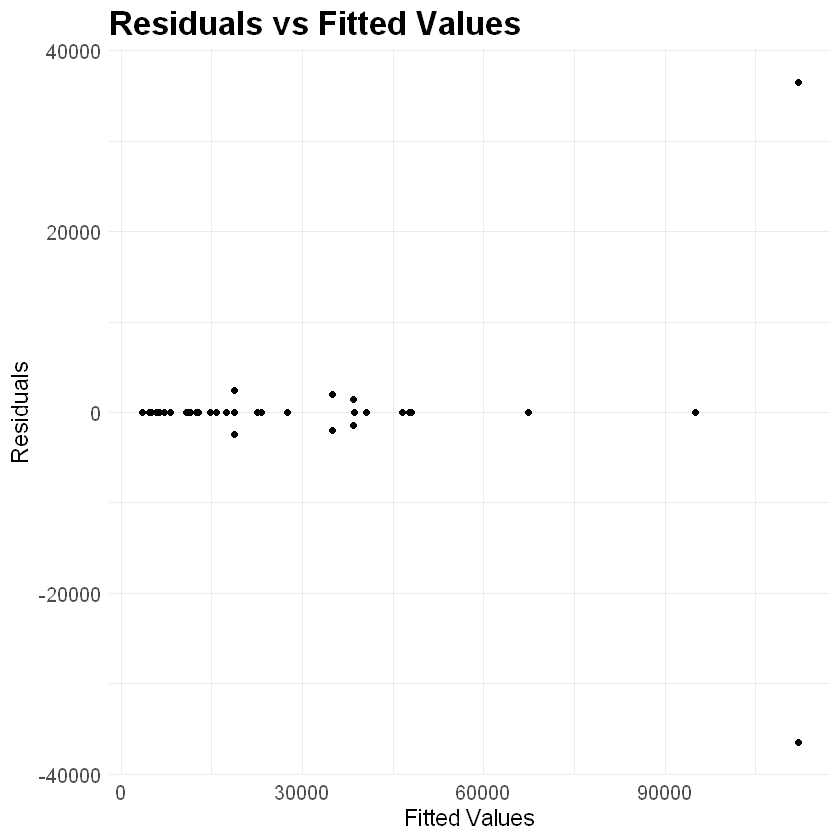

In [49]:
# Histogram of residuals
ggplot(data = data.frame(residuals = resid(model2)), aes(x = residuals)) +
  geom_histogram(binwidth = 10000, fill = "#BACD92", color = "black") +
  labs(title = "Histogram of Residuals",
       x = "Residuals",
       y = "Frequency") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),
        axis.text = element_text(size = 12),
        axis.title = element_text(size = 14))

# Q-Q plot of residuals
ggplot(data = data.frame(residuals = resid(model2)), aes(sample = residuals)) +
  stat_qq() +
  stat_qq_line() +
  labs(title = "Q-Q Plot of Residuals",
       x = "Theoretical Quantiles",
       y = "Sample Quantiles") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),
        axis.text = element_text(size = 12),
        axis.title = element_text(size = 14))

# Plot of residuals vs fitted values
ggplot(data = data.frame(fitted_values = fitted(model2), residuals = resid(model2)), 
                              aes(x = fitted_values, y = residuals)) +
  geom_point(fill = "#FCFFE0", color = "black") +
  labs(title = "Residuals vs Fitted Values",
       x = "Fitted Values",
       y = "Residuals") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),
        axis.text = element_text(size = 12),
        axis.title = element_text(size = 14))

In [51]:
# Calculate mean of residuals
mean_residuals <- mean(resid(model2))
print(mean_residuals)

# Normality of residuals: Shapiro-Wilk test
shapiro_test <- shapiro.test(resid(model2))
normality <- ifelse(shapiro_test$p.value >= 0.05, "Normally distributed", "Not normally distributed")
print(normality)

[1] -1.412809e-13
[1] "Not normally distributed"


Pr≈Ømƒõr rezidu√≠ je p≈ôibli≈ænƒõ $-1.41 \times 10^{-13}$. Stejnƒõ jako v p≈ôedchoz√≠m p≈ô√≠padƒõ je tento pr≈Ømƒõr velmi bl√≠zko nule, co≈æ znamen√°, ≈æe rezidua jsou v pr≈Ømƒõru soust≈ôedƒõna kolem nuly. V√Ωsledky Shapiro-Wilkova testu ukazuj√≠, ≈æe p-hodnota je ni≈æ≈°√≠ ne≈æ hladina v√Ωznamnosti 0,05. Proto zam√≠t√°me nulovou hypot√©zu o normalitƒõ a doch√°z√≠me k z√°vƒõru, ≈æe rezidua nejsou norm√°lnƒõ rozdƒõlena.

#### ‚ùÄ Odlehl√° pozorov√°n√≠ a multikolinearita

Analogicky jako v prvn√≠m modelu.

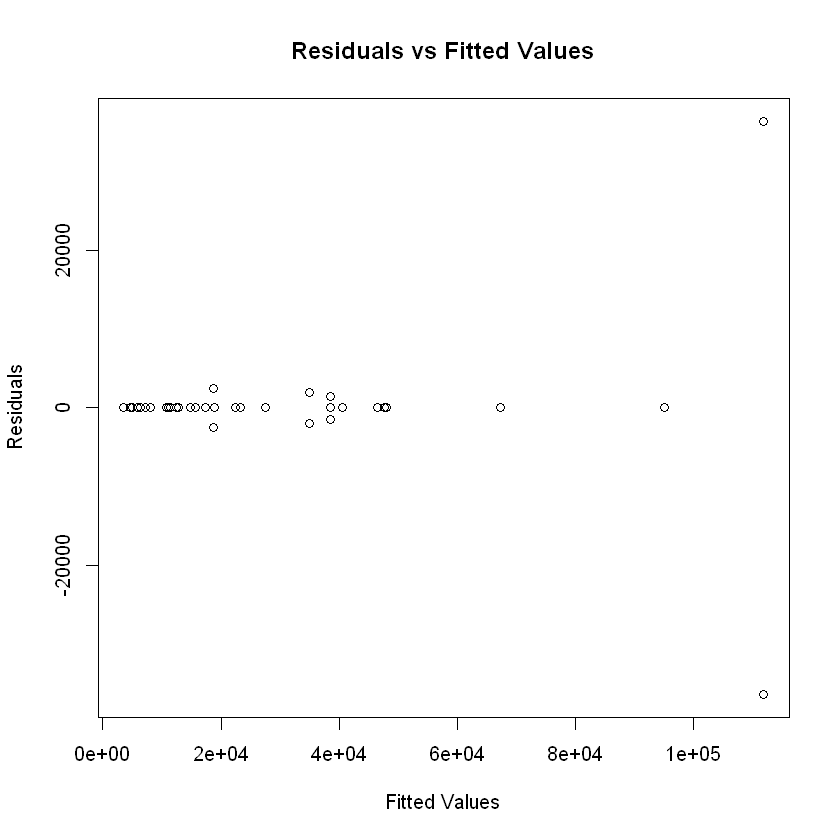

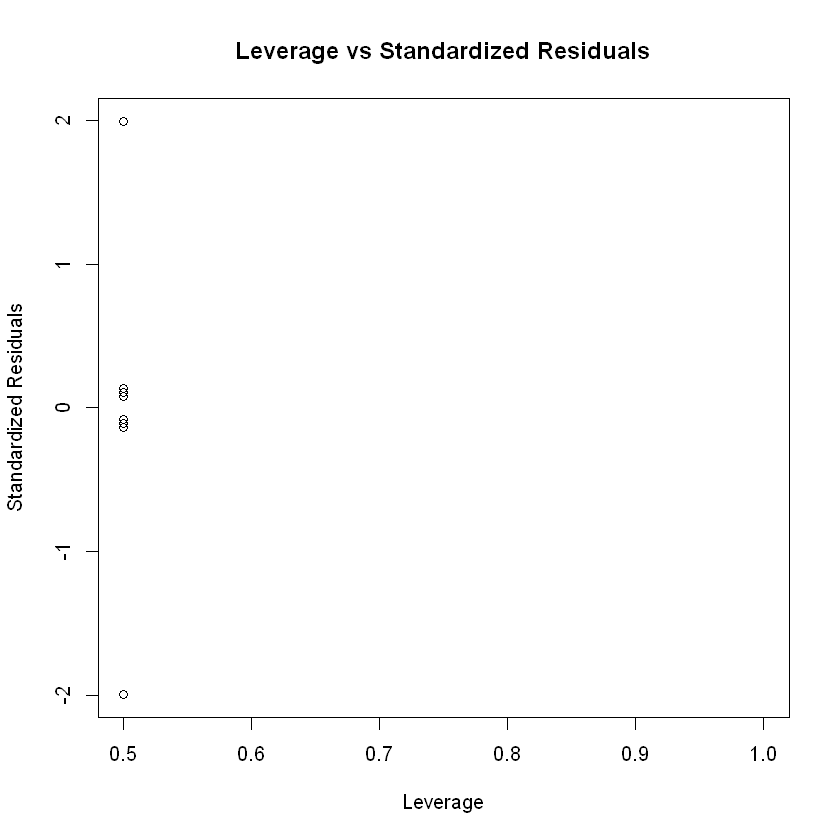

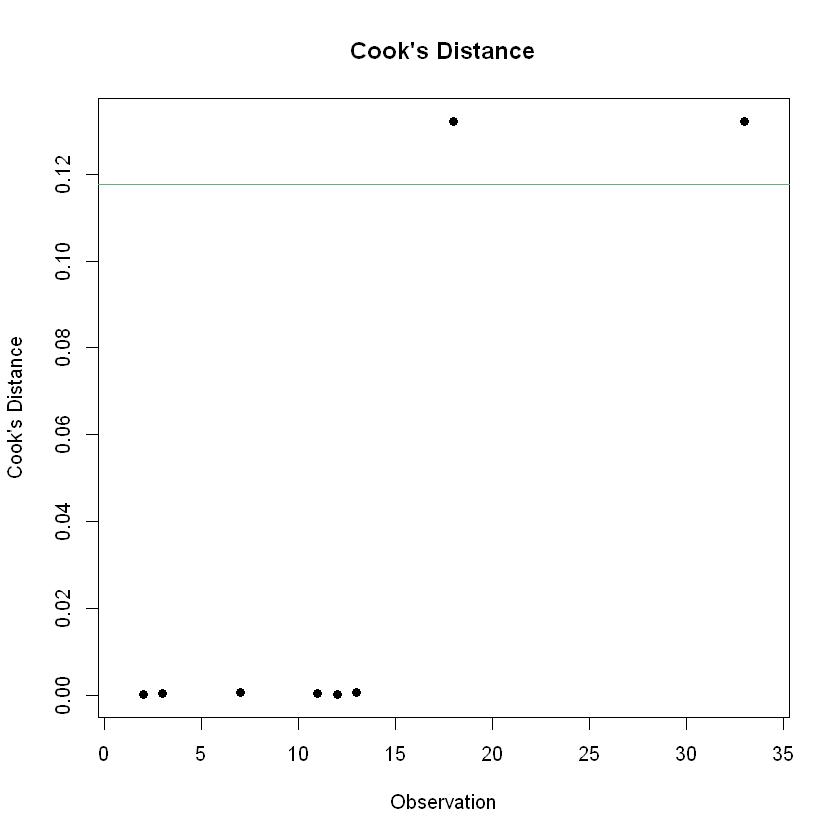

In [59]:
# Identify outliers
# Residual Analysis
plot(fitted(model2), resid(model2), main = "Residuals vs Fitted Values", xlab = "Fitted Values", ylab = "Residuals")

# Leverage-Residual plot
plot(hatvalues(model2), rstandard(model2), main = "Leverage vs Standardized Residuals", xlab = "Leverage", ylab = "Standardized Residuals")

# Cook's distance
cooks_dist <- cooks.distance(model2)
plot(cooks_dist, pch = 19, main = "Cook's Distance", xlab = "Observation", ylab = "Cook's Distance")
abline(h = 4/length(cooks_dist), col = "#75A47F")  # Highlight a threshold for influential observations

U kategori√°ln√≠ a spojit√© promƒõnn√© lze multikolinearitu mƒõ≈ôit pomoc√≠ t-testu (pokud m√° kategori√°ln√≠ promƒõnn√° 2 kategorie) nebo ANOVA (pokud m√° v√≠ce ne≈æ 2 kategorie). ANOVA test stejnƒõ pot≈ôebujeme p≈ôi zkoum√°n√≠ hypot√©z, tak≈æe pust√≠me se do toho.

In [71]:
# Perform ANOVA test
anova_result <- anova(model2)

# Print ANOVA table
print(anova_result)

Analysis of Variance Table

Response: hdp
          Df     Sum Sq    Mean Sq F value Pr(>F)
language  27 2.1780e+10  806665449  1.2033 0.4828
currency   2 5.4357e+09 2717869638  4.0541 0.1091
Residuals  4 2.6816e+09  670396775               


multikolinearita

Otestujeme p≈ôedpoklady modelu - pokud nebudou splnƒõny, vyv√≠j√≠me a otestujeme metody, kter√© toto selh√°n√≠ kompenzuj√≠ nebo p≈ôedpoklady odstra≈àuj√≠. Na to pou≈æijeme ANOVA test rozptylu. Stanov√≠me p≈ô√≠slu≈°n√© hypot√©zy.

**‚óè Promƒõnn√° "language"**

$H_0:$ Promƒõnn√° "language" nem√° v√Ωznamn√Ω vliv na promƒõnnou "HDP".

$H_A:$ Alespo≈à jedna z kategorie promƒõnn√© "language" m√° v√Ωznamn√Ω vliv na promƒõnnou "HDP".

**‚óè Promƒõnn√° "currency"**

$H_0:$ Promƒõnn√° "currency" nem√° v√Ωznamn√Ω vliv na promƒõnnou "HDP".

$H_A:$ Alespo≈à jedna z kategorie promƒõnn√© "currency" m√° v√Ωznamn√Ω vliv na promƒõnnou "HDP".

Promƒõnn√° "language": p-hodnota je 0,4828, co≈æ je v√≠ce ne≈æ hladina v√Ωznamnosti 0,05. Nulovou hypot√©zu tedy nezam√≠t√°me. Z toho vypl√Ωv√°, ≈æe kategorie jazyka nemaj√≠ v√Ωznamn√Ω vliv na HDP.

Promƒõnn√° "currency": p-hodnota je 0.1091, kter√° je yase vƒõt≈°√≠ ne≈æ 0,05. Nulovou hypot√©zu tedy nezam√≠t√°me ani v p≈ô√≠padƒõ mƒõny. To znamen√°, ≈æe kategorie mƒõny nemaj√≠ na HDP ≈æ√°dn√Ω v√Ωznamn√Ω vliv.

A opƒõt dva grafy, kter√© ukazuj√≠ vztah mezi HDP a (tentokr√°t) jazykem/mƒõnou.

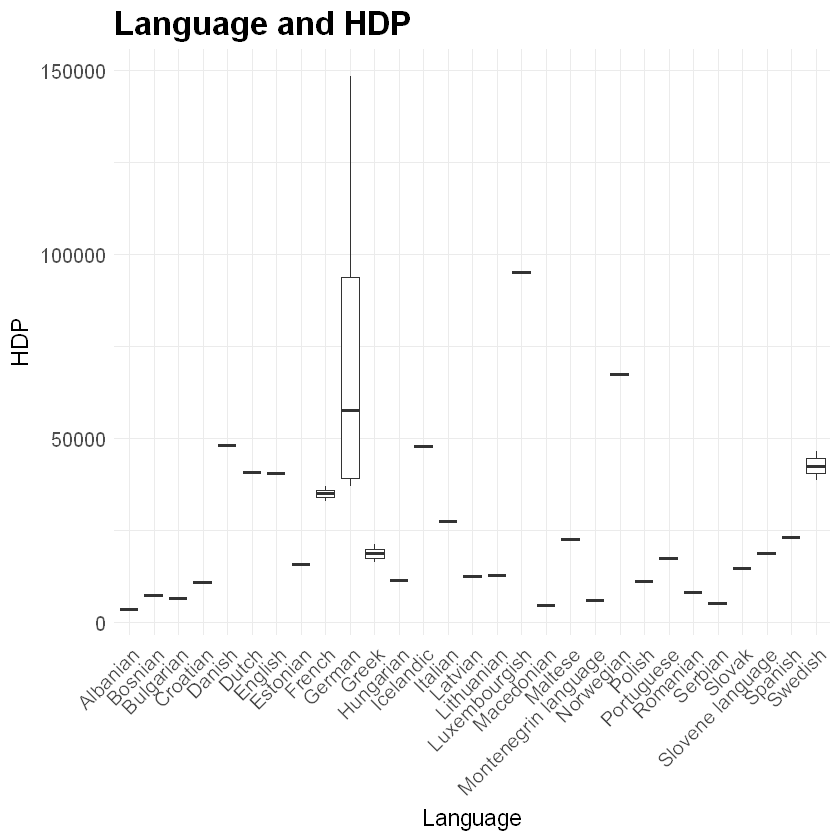

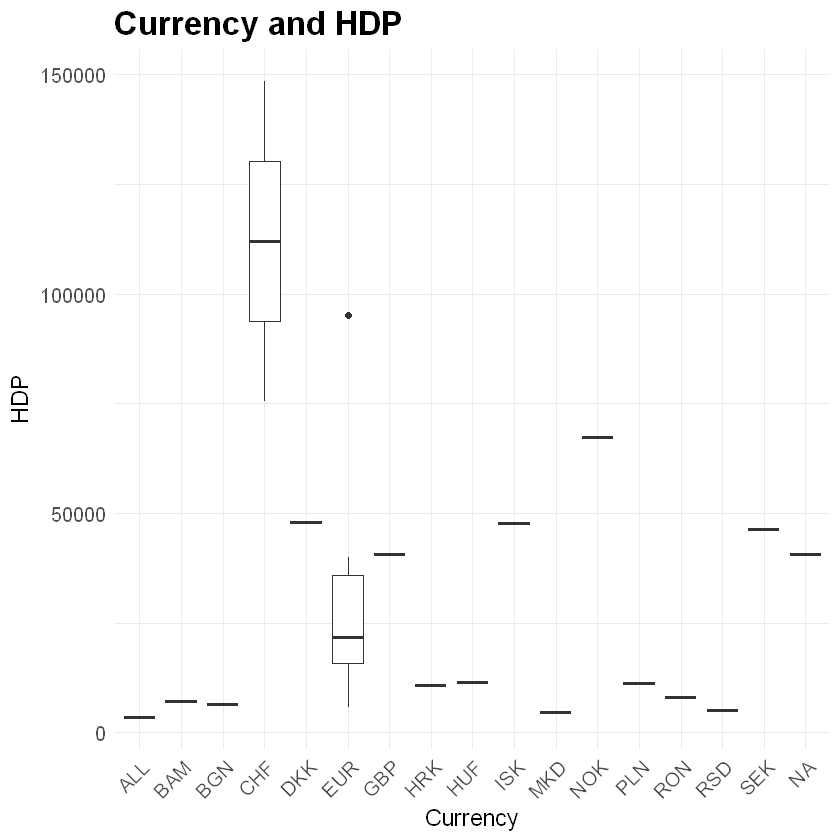

In [41]:
# HDP/Language
ggplot(data4, aes(x = language, y = hdp)) +
  geom_boxplot() +
  labs(title = "Language and HDP",
       x = "Language",
       y = "HDP") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),  # Caption size and style
        axis.text = element_text(size = 12),  # Text size on axes
        axis.title = element_text(size = 14),  # Size of axis labels
        axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate and align x-axis labels

# HDP/Currency
ggplot(data4, aes(x = currency, y = hdp)) +
  geom_boxplot() +
  labs(title = "Currency and HDP",
       x = "Currency",
       y = "HDP") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),  # Caption size and style
        axis.text = element_text(size = 12),  # Text size on axes
        axis.title = element_text(size = 14),  # Size of axis labels
        axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate and align x-axis labels

Grafy ukazuj√≠, ≈æe existuj√≠ v√Ωrazn√© rozd√≠ly v HDP v z√°vislosti na pou≈æ√≠van√© mƒõnƒõ a jazyce, p≈ôiƒçem≈æ nƒõkter√© mƒõny jako CHF a GBP a jazykov√© skupiny jako nƒõmeck√° a francouzsk√° maj√≠ tendenci b√Ωt spojeny s vy≈°≈°√≠m HDP.

Nyn√≠ se pokus√≠me naj√≠t fin√°ln√≠ model, kter√Ω chov√°n√≠ HDP dob≈ôe vysvƒõtluje, ale neobsahuje nev√Ωznamn√© komponenty.

In [75]:
str(data4)

'data.frame':	35 obs. of  4 variables:
 $ geo     : chr  "Albania" "Austria" "Belgium" "Bosnia and Herzegovina" ...
 $ hdp     : num  3560 39890 36960 7240 6380 ...
 $ language: Factor w/ 29 levels "Albanian","Bosnian",..: 1 10 9 2 3 4 11 5 8 29 ...
 $ currency: Factor w/ 16 levels "ALL","BAM","BGN",..: 1 6 6 2 3 8 6 5 6 6 ...


In [74]:
str(data2)

'data.frame':	40 obs. of  4 variables:
 $ geo    : chr  "Albania" "Austria" "Belgium" "Bulgaria" ...
 $ hdp    : num  3560 39890 36960 6380 10810 ...
 $ age    : num  34.7 43 41.4 43.4 42.8 37 41.1 41.5 41.4 43.3 ...
 $ density: num  100.1 104.9 371.8 66.2 74.4 ...


In [78]:
# Merge datasets based on 'geo' and 'hdp' columns
merged_data <- merge(data4, data2, by = c("geo", "hdp"), all = TRUE)

In [79]:
str(merged_data)

'data.frame':	41 obs. of  6 variables:
 $ geo     : chr  "Albania" "Austria" "Belgium" "Bosnia and Herzegovina" ...
 $ hdp     : num  3560 39890 36960 7240 6380 ...
 $ language: Factor w/ 29 levels "Albanian","Bosnian",..: 1 10 9 2 3 4 11 NA 5 8 ...
 $ currency: Factor w/ 16 levels "ALL","BAM","BGN",..: 1 6 6 2 3 8 6 NA 5 6 ...
 $ age     : num  34.7 43 41.4 NA 43.4 42.8 37 41.1 41.5 41.4 ...
 $ density : num  100.1 104.9 371.8 NA 66.2 ...


In [80]:
# Fitting the model with all regressors
fit_all <- lm(hdp ~ age + density + language + currency, data=merged_data)

# Model summary
summary(fit_all)


Call:
lm(formula = hdp ~ age + density + language + currency, data = merged_data)

Residuals:
         1          2          3          5          6          7          9 
 2.805e-11  3.475e+03 -2.539e+03 -4.964e-14 -6.181e-13  2.199e+03 -7.318e-13 
        10         14         15         16         17         18         19 
 1.777e-13  2.286e-11  2.539e+03 -3.475e+03 -2.199e+03 -2.551e-12 -3.907e-13 
        21         22         23         24         25         26         27 
-1.414e-12  1.201e-12  3.595e+04 -8.455e-13  1.052e-11 -1.542e-12 -2.778e-12 
        29         31         32         33         35         36         37 
-1.414e-12 -1.727e-12 -1.414e-12 -1.034e-11 -2.011e-12 -5.044e-13 -2.153e-12 
        38         39         41 
-3.822e-11 -3.595e+04  2.496e-14 

Coefficients: (10 not defined because of singularities)
                              Estimate Std. Error t value Pr(>|t|)
(Intercept)                    1022.08  256660.93   0.004    0.997
age                   

Z v√Ωsledk≈Ø modelu m≈Ø≈æeme vidƒõt, kter√© regresory jsou statisticky v√Ωznamn√© a kter√© ne.